In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import glob
import random
import os, json

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (19.0, 17.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Reload external python modules
%load_ext autoreload
%autoreload 2

In [5]:
print(os.listdir('dataset'))

['dataset']


In [19]:
!ls ./dataset/

broadleaf dataset   grass     soil      soybean


In [20]:
# delete all files in dataset/broadleaf, dataset/grass, dataset/soil, dataset/soybean
!rm -r ./dataset/broadleaf/*
!rm -r ./dataset/grass/*
!rm -r ./dataset/soil/*
!rm -r ./dataset/soybean/*

# Data Augmentation

In [21]:
class Data_augmentation:
    def __init__(self, path, image_name):
        '''
        Import image
        :param path: Path to the image
        :param image_name: image name
        '''
        self.path = path
        self.name = image_name
        print(path + image_name)
        self.image = cv2.imread(path + image_name)

    def rotate(self, image, angle=90, scale=1.0):
        '''
        Rotate the image
        :param image: image to be processed
        :param angle: Rotation angle in degrees. Positive values mean counter-clockwise rotation (the coordinate origin is assumed to be the top-left corner).
        :param scale: Isotropic scale factor.
        '''
        w = image.shape[1]
        h = image.shape[0]
        #rotate matrix
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale)
        #rotate
        image = cv2.warpAffine(image,M,(w,h))
        return image

    def flip(self, image, vflip=False, hflip=False):
        '''
        Flip the image
        :param image: image to be processed
        :param vflip: whether to flip the image vertically
        :param hflip: whether to flip the image horizontally
        '''
        if hflip or vflip:
            if hflip and vflip:
                c = -1
            else:
                c = 0 if vflip else 1
            image = cv2.flip(image, flipCode=c)
        return image 
    
    
    def image_augment(self, save_path): 
        '''
        Create the new image with imge augmentation
        :param path: the path to store the new image
        ''' 
        img = self.image.copy()
        img_flip = self.flip(img, vflip=True, hflip=False)
        img_rot = self.rotate(img)
        
        name_int = self.name[:len(self.name)-4]
        cv2.imwrite(save_path+'%s' %str(name_int)+'_vflip.jpg', img_flip)
        cv2.imwrite(save_path+'%s' %str(name_int)+'_rot.jpg', img_rot)

In [22]:
def main(file_dir,output_path):
    for root, _, files in os.walk(file_dir):
        print(root)
    for file in files:
        raw_image = Data_augmentation(root,file)
        raw_image.image_augment(output_path)

In [23]:
file_dir = './dataset/dataset/broadleaf/'
output_path = './dataset/broadleaf/'
main(file_dir=file_dir, output_path=output_path)

file_dir = './dataset/dataset/grass/'
output_path = './dataset/grass/'
main(file_dir=file_dir, output_path=output_path)

file_dir = './dataset/dataset/soil/'
output_path = './dataset/soil/'
main(file_dir=file_dir, output_path=output_path)

file_dir = './dataset/dataset/soybean/'
output_path = './dataset/soybean/'
main(file_dir=file_dir, output_path=output_path)

./dataset/dataset/broadleaf/
./dataset/dataset/broadleaf/304.tif
./dataset/dataset/broadleaf/462.tif
./dataset/dataset/broadleaf/476.tif
./dataset/dataset/broadleaf/310.tif
./dataset/dataset/broadleaf/338.tif
./dataset/dataset/broadleaf/1135.tif
./dataset/dataset/broadleaf/1121.tif
./dataset/dataset/broadleaf/1109.tif
./dataset/dataset/broadleaf/489.tif
./dataset/dataset/broadleaf/660.tif
./dataset/dataset/broadleaf/106.tif
./dataset/dataset/broadleaf/112.tif
./dataset/dataset/broadleaf/674.tif
./dataset/dataset/broadleaf/884.tif
./dataset/dataset/broadleaf/648.tif
./dataset/dataset/broadleaf/890.tif
./dataset/dataset/broadleaf/847.tif
./dataset/dataset/broadleaf/853.tif
./dataset/dataset/broadleaf/13.tif
./dataset/dataset/broadleaf/714.tif
./dataset/dataset/broadleaf/700.tif
./dataset/dataset/broadleaf/728.tif
./dataset/dataset/broadleaf/933.tif
./dataset/dataset/broadleaf/927.tif
./dataset/dataset/broadleaf/270.tif
./dataset/dataset/broadleaf/516.tif
./dataset/dataset/broadleaf/1082.

./dataset/dataset/broadleaf/261.tif
./dataset/dataset/broadleaf/1093.tif
./dataset/dataset/broadleaf/507.tif
./dataset/dataset/broadleaf/1078.tif
./dataset/dataset/broadleaf/1044.tif
./dataset/dataset/broadleaf/1050.tif
./dataset/dataset/broadleaf/1051.tif
./dataset/dataset/broadleaf/1045.tif
./dataset/dataset/broadleaf/1079.tif
./dataset/dataset/broadleaf/260.tif
./dataset/dataset/broadleaf/506.tif
./dataset/dataset/broadleaf/1092.tif
./dataset/dataset/broadleaf/1086.tif
./dataset/dataset/broadleaf/512.tif
./dataset/dataset/broadleaf/274.tif
./dataset/dataset/broadleaf/248.tif
./dataset/dataset/broadleaf/923.tif
./dataset/dataset/broadleaf/937.tif
./dataset/dataset/broadleaf/704.tif
./dataset/dataset/broadleaf/710.tif
./dataset/dataset/broadleaf/738.tif
./dataset/dataset/broadleaf/17.tif
./dataset/dataset/broadleaf/857.tif
./dataset/dataset/broadleaf/843.tif
./dataset/dataset/broadleaf/670.tif
./dataset/dataset/broadleaf/116.tif
./dataset/dataset/broadleaf/102.tif
./dataset/dataset/br

./dataset/dataset/broadleaf/770.tif
./dataset/dataset/broadleaf/764.tif
./dataset/dataset/broadleaf/994.tif
./dataset/dataset/broadleaf/758.tif
./dataset/dataset/broadleaf/980.tif
./dataset/dataset/broadleaf/63.tif
./dataset/dataset/broadleaf/823.tif
./dataset/dataset/broadleaf/77.tif
./dataset/dataset/broadleaf/837.tif
./dataset/dataset/broadleaf/189.tif
./dataset/dataset/broadleaf/162.tif
./dataset/dataset/broadleaf/604.tif
./dataset/dataset/broadleaf/610.tif
./dataset/dataset/broadleaf/88.tif
./dataset/dataset/broadleaf/176.tif
./dataset/dataset/broadleaf/638.tif
./dataset/dataset/broadleaf/1151.tif
./dataset/dataset/broadleaf/1145.tif
./dataset/dataset/broadleaf/1179.tif
./dataset/dataset/broadleaf/406.tif
./dataset/dataset/broadleaf/360.tif
./dataset/dataset/broadleaf/374.tif
./dataset/dataset/broadleaf/412.tif
./dataset/dataset/broadleaf/1186.tif
./dataset/dataset/broadleaf/348.tif
./dataset/dataset/broadleaf/438.tif
./dataset/dataset/broadleaf/362.tif
./dataset/dataset/broadleaf

./dataset/dataset/broadleaf/807.tif
./dataset/dataset/broadleaf/1.tif
./dataset/dataset/broadleaf/53.tif
./dataset/dataset/broadleaf/813.tif
./dataset/dataset/broadleaf/185.tif
./dataset/dataset/broadleaf/191.tif
./dataset/dataset/broadleaf/84.tif
./dataset/dataset/broadleaf/90.tif
./dataset/dataset/broadleaf/608.tif
./dataset/dataset/broadleaf/620.tif
./dataset/dataset/broadleaf/146.tif
./dataset/dataset/broadleaf/152.tif
./dataset/dataset/broadleaf/634.tif
./dataset/dataset/broadleaf/1149.tif
./dataset/dataset/broadleaf/387.tif
./dataset/dataset/broadleaf/1175.tif
./dataset/dataset/broadleaf/1161.tif
./dataset/dataset/broadleaf/393.tif
./dataset/dataset/broadleaf/378.tif
./dataset/dataset/broadleaf/344.tif
./dataset/dataset/broadleaf/422.tif
./dataset/dataset/broadleaf/436.tif
./dataset/dataset/broadleaf/350.tif
./dataset/dataset/broadleaf/368.tif
./dataset/dataset/broadleaf/354.tif
./dataset/dataset/broadleaf/432.tif
./dataset/dataset/broadleaf/426.tif
./dataset/dataset/broadleaf/34

./dataset/dataset/broadleaf/907.tif
./dataset/dataset/broadleaf/913.tif
./dataset/dataset/broadleaf/708.tif
./dataset/dataset/broadleaf/720.tif
./dataset/dataset/broadleaf/734.tif
./dataset/dataset/broadleaf/33.tif
./dataset/dataset/broadleaf/873.tif
./dataset/dataset/broadleaf/27.tif
./dataset/dataset/broadleaf/867.tif
./dataset/dataset/broadleaf/697.tif
./dataset/dataset/broadleaf/683.tif
./dataset/dataset/broadleaf/668.tif
./dataset/dataset/broadleaf/132.tif
./dataset/dataset/broadleaf/654.tif
./dataset/dataset/broadleaf/898.tif
./dataset/dataset/broadleaf/640.tif
./dataset/dataset/broadleaf/126.tif
./dataset/dataset/broadleaf/1129.tif
./dataset/dataset/broadleaf/1101.tif
./dataset/dataset/broadleaf/495.tif
./dataset/dataset/broadleaf/481.tif
./dataset/dataset/broadleaf/1115.tif
./dataset/dataset/broadleaf/318.tif
./dataset/dataset/broadleaf/456.tif
./dataset/dataset/broadleaf/330.tif
./dataset/dataset/broadleaf/324.tif
./dataset/dataset/broadleaf/442.tif
./dataset/dataset/broadleaf

./dataset/dataset/broadleaf/1104.tif
./dataset/dataset/broadleaf/490.tif
./dataset/dataset/broadleaf/484.tif
./dataset/dataset/broadleaf/1110.tif
./dataset/dataset/broadleaf/1138.tif
./dataset/dataset/broadleaf/335.tif
./dataset/dataset/broadleaf/453.tif
./dataset/dataset/broadleaf/447.tif
./dataset/dataset/broadleaf/321.tif
./dataset/dataset/broadleaf/309.tif
./dataset/dataset/grass/
./dataset/dataset/grass/3087.tif
./dataset/dataset/grass/2399.tif
./dataset/dataset/grass/304.tif
./dataset/dataset/grass/1690.tif
./dataset/dataset/grass/1848.tif
./dataset/dataset/grass/462.tif
./dataset/dataset/grass/476.tif
./dataset/dataset/grass/1684.tif
./dataset/dataset/grass/310.tif
./dataset/dataset/grass/3093.tif
./dataset/dataset/grass/338.tif
./dataset/dataset/grass/1874.tif
./dataset/dataset/grass/1860.tif
./dataset/dataset/grass/1653.tif
./dataset/dataset/grass/3044.tif
./dataset/dataset/grass/1135.tif
./dataset/dataset/grass/1121.tif
./dataset/dataset/grass/2428.tif
./dataset/dataset/grass

./dataset/dataset/grass/3292.tif
./dataset/dataset/grass/111.tif
./dataset/dataset/grass/1485.tif
./dataset/dataset/grass/1491.tif
./dataset/dataset/grass/105.tif
./dataset/dataset/grass/2198.tif
./dataset/dataset/grass/3286.tif
./dataset/dataset/grass/2826.tif
./dataset/dataset/grass/663.tif
./dataset/dataset/grass/893.tif
./dataset/dataset/grass/139.tif
./dataset/dataset/grass/887.tif
./dataset/dataset/grass/2629.tif
./dataset/dataset/grass/1320.tif
./dataset/dataset/grass/1446.tif
./dataset/dataset/grass/3251.tif
./dataset/dataset/grass/3245.tif
./dataset/dataset/grass/1452.tif
./dataset/dataset/grass/878.tif
./dataset/dataset/grass/1334.tif
./dataset/dataset/grass/38.tif
./dataset/dataset/grass/850.tif
./dataset/dataset/grass/688.tif
./dataset/dataset/grass/10.tif
./dataset/dataset/grass/2615.tif
./dataset/dataset/grass/2173.tif
./dataset/dataset/grass/3279.tif
./dataset/dataset/grass/2167.tif
./dataset/dataset/grass/2601.tif
./dataset/dataset/grass/844.tif
./dataset/dataset/grass/

./dataset/dataset/grass/2770.tif
./dataset/dataset/grass/1279.tif
./dataset/dataset/grass/935.tif
./dataset/dataset/grass/2016.tif
./dataset/dataset/grass/3308.tif
./dataset/dataset/grass/1537.tif
./dataset/dataset/grass/3320.tif
./dataset/dataset/grass/3446.tif
./dataset/dataset/grass/2980.tif
./dataset/dataset/grass/2758.tif
./dataset/dataset/grass/1251.tif
./dataset/dataset/grass/1245.tif
./dataset/dataset/grass/909.tif
./dataset/dataset/grass/3452.tif
./dataset/dataset/grass/2994.tif
./dataset/dataset/grass/3334.tif
./dataset/dataset/grass/1523.tif
./dataset/dataset/grass/538.tif
./dataset/dataset/grass/1912.tif
./dataset/dataset/grass/1906.tif
./dataset/dataset/grass/2599.tif
./dataset/dataset/grass/1090.tif
./dataset/dataset/grass/504.tif
./dataset/dataset/grass/262.tif
./dataset/dataset/grass/276.tif
./dataset/dataset/grass/510.tif
./dataset/dataset/grass/1084.tif
./dataset/dataset/grass/2566.tif
./dataset/dataset/grass/1709.tif
./dataset/dataset/grass/2200.tif
./dataset/dataset

./dataset/dataset/grass/2558.tif
./dataset/dataset/grass/1051.tif
./dataset/dataset/grass/1045.tif
./dataset/dataset/grass/3134.tif
./dataset/dataset/grass/1723.tif
./dataset/dataset/grass/2202.tif
./dataset/dataset/grass/2564.tif
./dataset/dataset/grass/2570.tif
./dataset/dataset/grass/1079.tif
./dataset/dataset/grass/2216.tif
./dataset/dataset/grass/3108.tif
./dataset/dataset/grass/260.tif
./dataset/dataset/grass/506.tif
./dataset/dataset/grass/1092.tif
./dataset/dataset/grass/1086.tif
./dataset/dataset/grass/512.tif
./dataset/dataset/grass/274.tif
./dataset/dataset/grass/1938.tif
./dataset/dataset/grass/1910.tif
./dataset/dataset/grass/248.tif
./dataset/dataset/grass/1904.tif
./dataset/dataset/grass/1253.tif
./dataset/dataset/grass/2982.tif
./dataset/dataset/grass/3444.tif
./dataset/dataset/grass/3322.tif
./dataset/dataset/grass/1535.tif
./dataset/dataset/grass/1521.tif
./dataset/dataset/grass/3336.tif
./dataset/dataset/grass/2028.tif
./dataset/dataset/grass/2996.tif
./dataset/datas

./dataset/dataset/grass/1584.tif
./dataset/dataset/grass/3393.tif
./dataset/dataset/grass/2933.tif
./dataset/dataset/grass/776.tif
./dataset/dataset/grass/71.tif
./dataset/dataset/grass/831.tif
./dataset/dataset/grass/2674.tif
./dataset/dataset/grass/2112.tif
./dataset/dataset/grass/2106.tif
./dataset/dataset/grass/3218.tif
./dataset/dataset/grass/2660.tif
./dataset/dataset/grass/65.tif
./dataset/dataset/grass/1369.tif
./dataset/dataset/grass/825.tif
./dataset/dataset/grass/2890.tif
./dataset/dataset/grass/2648.tif
./dataset/dataset/grass/1341.tif
./dataset/dataset/grass/1427.tif
./dataset/dataset/grass/3230.tif
./dataset/dataset/grass/3224.tif
./dataset/dataset/grass/1433.tif
./dataset/dataset/grass/59.tif
./dataset/dataset/grass/1355.tif
./dataset/dataset/grass/819.tif
./dataset/dataset/grass/2884.tif
./dataset/dataset/grass/158.tif
./dataset/dataset/grass/1382.tif
./dataset/dataset/grass/616.tif
./dataset/dataset/grass/2853.tif
./dataset/dataset/grass/170.tif
./dataset/dataset/grass

./dataset/dataset/grass/1168.tif
./dataset/dataset/grass/2461.tif
./dataset/dataset/grass/2475.tif
./dataset/dataset/grass/2313.tif
./dataset/dataset/grass/1632.tif
./dataset/dataset/grass/3025.tif
./dataset/dataset/grass/1154.tif
./dataset/dataset/grass/1140.tif
./dataset/dataset/grass/2449.tif
./dataset/dataset/grass/3031.tif
./dataset/dataset/grass/1626.tif
./dataset/dataset/grass/1815.tif
./dataset/dataset/grass/359.tif
./dataset/dataset/grass/1801.tif
./dataset/dataset/grass/1829.tif
./dataset/dataset/grass/365.tif
./dataset/dataset/grass/1197.tif
./dataset/dataset/grass/403.tif
./dataset/dataset/grass/417.tif
./dataset/dataset/grass/1183.tif
./dataset/dataset/grass/371.tif
./dataset/dataset/grass/349.tif
./dataset/dataset/grass/1805.tif
./dataset/dataset/grass/1811.tif
./dataset/dataset/grass/375.tif
./dataset/dataset/grass/1839.tif
./dataset/dataset/grass/1187.tif
./dataset/dataset/grass/413.tif
./dataset/dataset/grass/407.tif
./dataset/dataset/grass/1193.tif
./dataset/dataset/g

./dataset/dataset/grass/2300.tif
./dataset/dataset/grass/2466.tif
./dataset/dataset/grass/2472.tif
./dataset/dataset/grass/2314.tif
./dataset/dataset/grass/389.tif
./dataset/dataset/grass/3022.tif
./dataset/dataset/grass/1635.tif
./dataset/dataset/grass/1153.tif
./dataset/dataset/grass/1147.tif
./dataset/dataset/grass/1621.tif
./dataset/dataset/grass/2328.tif
./dataset/dataset/grass/3036.tif
./dataset/dataset/grass/148.tif
./dataset/dataset/grass/1392.tif
./dataset/dataset/grass/606.tif
./dataset/dataset/grass/2843.tif
./dataset/dataset/grass/160.tif
./dataset/dataset/grass/174.tif
./dataset/dataset/grass/2857.tif
./dataset/dataset/grass/612.tif
./dataset/dataset/grass/1386.tif
./dataset/dataset/grass/821.tif
./dataset/dataset/grass/61.tif
./dataset/dataset/grass/2664.tif
./dataset/dataset/grass/2102.tif
./dataset/dataset/grass/3208.tif
./dataset/dataset/grass/2116.tif
./dataset/dataset/grass/2670.tif
./dataset/dataset/grass/835.tif
./dataset/dataset/grass/75.tif
./dataset/dataset/gras

./dataset/dataset/grass/2132.tif
./dataset/dataset/grass/2913.tif
./dataset/dataset/grass/756.tif
./dataset/dataset/grass/742.tif
./dataset/dataset/grass/2907.tif
./dataset/dataset/grass/2091.tif
./dataset/dataset/grass/1598.tif
./dataset/dataset/grass/2085.tif
./dataset/dataset/grass/3370.tif
./dataset/dataset/grass/1567.tif
./dataset/dataset/grass/795.tif
./dataset/dataset/grass/1201.tif
./dataset/dataset/grass/3416.tif
./dataset/dataset/grass/2708.tif
./dataset/dataset/grass/3402.tif
./dataset/dataset/grass/1215.tif
./dataset/dataset/grass/781.tif
./dataset/dataset/grass/959.tif
./dataset/dataset/grass/1573.tif
./dataset/dataset/grass/3364.tif
./dataset/dataset/grass/2052.tif
./dataset/dataset/grass/2734.tif
./dataset/dataset/grass/971.tif
./dataset/dataset/grass/1229.tif
./dataset/dataset/grass/965.tif
./dataset/dataset/grass/2720.tif
./dataset/dataset/grass/2046.tif
./dataset/dataset/grass/3358.tif
./dataset/dataset/grass/554.tif
./dataset/dataset/grass/232.tif
./dataset/dataset/g

./dataset/dataset/grass/580.tif
./dataset/dataset/grass/1014.tif
./dataset/dataset/grass/3165.tif
./dataset/dataset/grass/1772.tif
./dataset/dataset/grass/1766.tif
./dataset/dataset/grass/3171.tif
./dataset/dataset/grass/2509.tif
./dataset/dataset/grass/1000.tif
./dataset/dataset/grass/594.tif
./dataset/dataset/grass/2521.tif
./dataset/dataset/grass/1028.tif
./dataset/dataset/grass/1996.tif
./dataset/dataset/grass/3159.tif
./dataset/dataset/grass/2247.tif
./dataset/dataset/grass/2253.tif
./dataset/dataset/grass/1982.tif
./dataset/dataset/grass/2535.tif
./dataset/dataset/grass/1983.tif
./dataset/dataset/grass/2252.tif
./dataset/dataset/grass/2534.tif
./dataset/dataset/grass/1029.tif
./dataset/dataset/grass/2520.tif
./dataset/dataset/grass/2246.tif
./dataset/dataset/grass/3158.tif
./dataset/dataset/grass/1997.tif
./dataset/dataset/grass/3170.tif
./dataset/dataset/grass/1767.tif
./dataset/dataset/grass/595.tif
./dataset/dataset/grass/1001.tif
./dataset/dataset/grass/2508.tif
./dataset/dat

./dataset/dataset/grass/2257.tif
./dataset/dataset/grass/3149.tif
./dataset/dataset/grass/2243.tif
./dataset/dataset/grass/1992.tif
./dataset/dataset/grass/2525.tif
./dataset/dataset/grass/553.tif
./dataset/dataset/grass/235.tif
./dataset/dataset/grass/1979.tif
./dataset/dataset/grass/221.tif
./dataset/dataset/grass/547.tif
./dataset/dataset/grass/2294.tif
./dataset/dataset/grass/209.tif
./dataset/dataset/grass/1945.tif
./dataset/dataset/grass/1789.tif
./dataset/dataset/grass/1951.tif
./dataset/dataset/grass/2280.tif
./dataset/dataset/grass/1560.tif
./dataset/dataset/grass/3377.tif
./dataset/dataset/grass/2069.tif
./dataset/dataset/grass/3411.tif
./dataset/dataset/grass/1206.tif
./dataset/dataset/grass/792.tif
./dataset/dataset/grass/786.tif
./dataset/dataset/grass/1212.tif
./dataset/dataset/grass/3405.tif
./dataset/dataset/grass/3363.tif
./dataset/dataset/grass/1574.tif
./dataset/dataset/grass/2055.tif
./dataset/dataset/grass/976.tif
./dataset/dataset/grass/2733.tif
./dataset/dataset/

./dataset/dataset/grass/2730.tif
./dataset/dataset/grass/3348.tif
./dataset/dataset/grass/2056.tif
./dataset/dataset/grass/2903.tif
./dataset/dataset/grass/746.tif
./dataset/dataset/grass/752.tif
./dataset/dataset/grass/2917.tif
./dataset/dataset/grass/2081.tif
./dataset/dataset/grass/1588.tif
./dataset/dataset/grass/2095.tif
./dataset/dataset/grass/3214.tif
./dataset/dataset/grass/197.tif
./dataset/dataset/grass/1403.tif
./dataset/dataset/grass/1365.tif
./dataset/dataset/grass/69.tif
./dataset/dataset/grass/829.tif
./dataset/dataset/grass/2678.tif
./dataset/dataset/grass/1371.tif
./dataset/dataset/grass/1417.tif
./dataset/dataset/grass/183.tif
./dataset/dataset/grass/3200.tif
./dataset/dataset/grass/2136.tif
./dataset/dataset/grass/3228.tif
./dataset/dataset/grass/7.tif
./dataset/dataset/grass/2888.tif
./dataset/dataset/grass/2650.tif
./dataset/dataset/grass/1359.tif
./dataset/dataset/grass/55.tif
./dataset/dataset/grass/815.tif
./dataset/dataset/grass/41.tif
./dataset/dataset/grass/8

./dataset/dataset/grass/2187.tif
./dataset/dataset/grass/132.tif
./dataset/dataset/grass/654.tif
./dataset/dataset/grass/2811.tif
./dataset/dataset/grass/2805.tif
./dataset/dataset/grass/898.tif
./dataset/dataset/grass/640.tif
./dataset/dataset/grass/126.tif
./dataset/dataset/grass/2434.tif
./dataset/dataset/grass/1883.tif
./dataset/dataset/grass/2352.tif
./dataset/dataset/grass/3058.tif
./dataset/dataset/grass/2346.tif
./dataset/dataset/grass/1897.tif
./dataset/dataset/grass/1129.tif
./dataset/dataset/grass/2420.tif
./dataset/dataset/grass/1101.tif
./dataset/dataset/grass/495.tif
./dataset/dataset/grass/2408.tif
./dataset/dataset/grass/3070.tif
./dataset/dataset/grass/1667.tif
./dataset/dataset/grass/1673.tif
./dataset/dataset/grass/3064.tif
./dataset/dataset/grass/481.tif
./dataset/dataset/grass/1115.tif
./dataset/dataset/grass/2391.tif
./dataset/dataset/grass/1840.tif
./dataset/dataset/grass/1698.tif
./dataset/dataset/grass/1854.tif
./dataset/dataset/grass/318.tif
./dataset/dataset/

./dataset/dataset/grass/333.tif
./dataset/dataset/grass/455.tif
./dataset/dataset/grass/1847.tif
./dataset/dataset/grass/3088.tif
./dataset/dataset/grass/2396.tif
./dataset/dataset/grass/2382.tif
./dataset/dataset/grass/1853.tif
./dataset/dataset/grass/479.tif
./dataset/dataset/grass/451.tif
./dataset/dataset/grass/337.tif
./dataset/dataset/grass/323.tif
./dataset/dataset/grass/445.tif
./dataset/dataset/grass/2433.tif
./dataset/dataset/grass/2355.tif
./dataset/dataset/grass/1884.tif
./dataset/dataset/grass/1890.tif
./dataset/dataset/grass/1648.tif
./dataset/dataset/grass/2341.tif
./dataset/dataset/grass/2427.tif
./dataset/dataset/grass/492.tif
./dataset/dataset/grass/1106.tif
./dataset/dataset/grass/1660.tif
./dataset/dataset/grass/2369.tif
./dataset/dataset/grass/3077.tif
./dataset/dataset/grass/3063.tif
./dataset/dataset/grass/1674.tif
./dataset/dataset/grass/1112.tif
./dataset/dataset/grass/486.tif
./dataset/dataset/grass/2194.tif
./dataset/dataset/grass/109.tif
./dataset/dataset/gr

./dataset/dataset/grass/136.tif
./dataset/dataset/grass/2140.tif
./dataset/dataset/grass/1449.tif
./dataset/dataset/grass/863.tif
./dataset/dataset/grass/23.tif
./dataset/dataset/grass/2626.tif
./dataset/dataset/grass/2632.tif
./dataset/dataset/grass/877.tif
./dataset/dataset/grass/37.tif
./dataset/dataset/grass/2154.tif
./dataset/dataset/grass/1475.tif
./dataset/dataset/grass/3262.tif
./dataset/dataset/grass/3504.tif
./dataset/dataset/grass/687.tif
./dataset/dataset/grass/1313.tif
./dataset/dataset/grass/1307.tif
./dataset/dataset/grass/693.tif
./dataset/dataset/grass/3510.tif
./dataset/dataset/grass/3276.tif
./dataset/dataset/grass/2168.tif
./dataset/dataset/grass/1461.tif
./dataset/dataset/grass/2791.tif
./dataset/dataset/grass/2949.tif
./dataset/dataset/grass/1298.tif
./dataset/dataset/grass/718.tif
./dataset/dataset/grass/2785.tif
./dataset/dataset/grass/730.tif
./dataset/dataset/grass/2975.tif
./dataset/dataset/grass/2961.tif
./dataset/dataset/grass/724.tif
./dataset/dataset/gras

./dataset/dataset/soil/2548.tif
./dataset/dataset/soil/1041.tif
./dataset/dataset/soil/1055.tif
./dataset/dataset/soil/3124.tif
./dataset/dataset/soil/1733.tif
./dataset/dataset/soil/2212.tif
./dataset/dataset/soil/2574.tif
./dataset/dataset/soil/2560.tif
./dataset/dataset/soil/1069.tif
./dataset/dataset/soil/3118.tif
./dataset/dataset/soil/2206.tif
./dataset/dataset/soil/1068.tif
./dataset/dataset/soil/2561.tif
./dataset/dataset/soil/2207.tif
./dataset/dataset/soil/3119.tif
./dataset/dataset/soil/2213.tif
./dataset/dataset/soil/2575.tif
./dataset/dataset/soil/1054.tif
./dataset/dataset/soil/1732.tif
./dataset/dataset/soil/3125.tif
./dataset/dataset/soil/3131.tif
./dataset/dataset/soil/1726.tif
./dataset/dataset/soil/1040.tif
./dataset/dataset/soil/2549.tif
./dataset/dataset/soil/259.tif
./dataset/dataset/soil/1915.tif
./dataset/dataset/soil/1901.tif
./dataset/dataset/soil/503.tif
./dataset/dataset/soil/1097.tif
./dataset/dataset/soil/265.tif
./dataset/dataset/soil/1929.tif
./dataset/d

./dataset/dataset/soil/676.tif
./dataset/dataset/soil/1484.tif
./dataset/dataset/soil/110.tif
./dataset/dataset/soil/2402.tif
./dataset/dataset/soil/2364.tif
./dataset/dataset/soil/2370.tif
./dataset/dataset/soil/1679.tif
./dataset/dataset/soil/2416.tif
./dataset/dataset/soil/1137.tif
./dataset/dataset/soil/3046.tif
./dataset/dataset/soil/2358.tif
./dataset/dataset/soil/1651.tif
./dataset/dataset/soil/1889.tif
./dataset/dataset/soil/1645.tif
./dataset/dataset/soil/3052.tif
./dataset/dataset/soil/1123.tif
./dataset/dataset/soil/1876.tif
./dataset/dataset/soil/1862.tif
./dataset/dataset/soil/448.tif
./dataset/dataset/soil/460.tif
./dataset/dataset/soil/1692.tif
./dataset/dataset/soil/306.tif
./dataset/dataset/soil/3085.tif
./dataset/dataset/soil/3091.tif
./dataset/dataset/soil/312.tif
./dataset/dataset/soil/1686.tif
./dataset/dataset/soil/474.tif
./dataset/dataset/soil/1866.tif
./dataset/dataset/soil/1872.tif
./dataset/dataset/soil/458.tif
./dataset/dataset/soil/470.tif
./dataset/dataset

./dataset/dataset/soil/2613.tif
./dataset/dataset/soil/2175.tif
./dataset/dataset/soil/3243.tif
./dataset/dataset/soil/1454.tif
./dataset/dataset/soil/1332.tif
./dataset/dataset/soil/1326.tif
./dataset/dataset/soil/1440.tif
./dataset/dataset/soil/2149.tif
./dataset/dataset/soil/2968.tif
./dataset/dataset/soil/739.tif
./dataset/dataset/soil/2954.tif
./dataset/dataset/soil/1285.tif
./dataset/dataset/soil/711.tif
./dataset/dataset/soil/705.tif
./dataset/dataset/soil/1291.tif
./dataset/dataset/soil/2798.tif
./dataset/dataset/soil/2940.tif
./dataset/dataset/soil/2015.tif
./dataset/dataset/soil/2773.tif
./dataset/dataset/soil/936.tif
./dataset/dataset/soil/922.tif
./dataset/dataset/soil/2767.tif
./dataset/dataset/soil/2001.tif
./dataset/dataset/soil/1508.tif
./dataset/dataset/soil/2029.tif
./dataset/dataset/soil/1520.tif
./dataset/dataset/soil/1246.tif
./dataset/dataset/soil/2997.tif
./dataset/dataset/soil/2983.tif
./dataset/dataset/soil/1252.tif
./dataset/dataset/soil/1534.tif
./dataset/dat

./dataset/dataset/soil/206.tif
./dataset/dataset/soil/1792.tif
./dataset/dataset/soil/3185.tif
./dataset/dataset/soil/560.tif
./dataset/dataset/soil/574.tif
./dataset/dataset/soil/3191.tif
./dataset/dataset/soil/1786.tif
./dataset/dataset/soil/212.tif
./dataset/dataset/soil/945.tif
./dataset/dataset/soil/1209.tif
./dataset/dataset/soil/2700.tif
./dataset/dataset/soil/2066.tif
./dataset/dataset/soil/2072.tif
./dataset/dataset/soil/2714.tif
./dataset/dataset/soil/951.tif
./dataset/dataset/soil/789.tif
./dataset/dataset/soil/979.tif
./dataset/dataset/soil/1235.tif
./dataset/dataset/soil/1553.tif
./dataset/dataset/soil/1547.tif
./dataset/dataset/soil/1221.tif
./dataset/dataset/soil/2728.tif
./dataset/dataset/soil/986.tif
./dataset/dataset/soil/992.tif
./dataset/dataset/soil/762.tif
./dataset/dataset/soil/2927.tif
./dataset/dataset/soil/2099.tif
./dataset/dataset/soil/1590.tif
./dataset/dataset/soil/1584.tif
./dataset/dataset/soil/2933.tif
./dataset/dataset/soil/776.tif
./dataset/dataset/so

./dataset/dataset/soil/615.tif
./dataset/dataset/soil/2688.tif
./dataset/dataset/soil/2850.tif
./dataset/dataset/soil/3019.tif
./dataset/dataset/soil/2307.tif
./dataset/dataset/soil/1168.tif
./dataset/dataset/soil/2461.tif
./dataset/dataset/soil/2475.tif
./dataset/dataset/soil/2313.tif
./dataset/dataset/soil/1632.tif
./dataset/dataset/soil/3025.tif
./dataset/dataset/soil/1154.tif
./dataset/dataset/soil/1140.tif
./dataset/dataset/soil/2449.tif
./dataset/dataset/soil/3031.tif
./dataset/dataset/soil/1626.tif
./dataset/dataset/soil/1815.tif
./dataset/dataset/soil/359.tif
./dataset/dataset/soil/1801.tif
./dataset/dataset/soil/1829.tif
./dataset/dataset/soil/365.tif
./dataset/dataset/soil/1197.tif
./dataset/dataset/soil/403.tif
./dataset/dataset/soil/417.tif
./dataset/dataset/soil/1183.tif
./dataset/dataset/soil/371.tif
./dataset/dataset/soil/349.tif
./dataset/dataset/soil/1805.tif
./dataset/dataset/soil/1811.tif
./dataset/dataset/soil/375.tif
./dataset/dataset/soil/1839.tif
./dataset/datase

./dataset/dataset/soil/3208.tif
./dataset/dataset/soil/2116.tif
./dataset/dataset/soil/2670.tif
./dataset/dataset/soil/835.tif
./dataset/dataset/soil/75.tif
./dataset/dataset/soil/1379.tif
./dataset/dataset/soil/2658.tif
./dataset/dataset/soil/2880.tif
./dataset/dataset/soil/1351.tif
./dataset/dataset/soil/1437.tif
./dataset/dataset/soil/3220.tif
./dataset/dataset/soil/3234.tif
./dataset/dataset/soil/1423.tif
./dataset/dataset/soil/809.tif
./dataset/dataset/soil/49.tif
./dataset/dataset/soil/1345.tif
./dataset/dataset/soil/2894.tif
./dataset/dataset/soil/996.tif
./dataset/dataset/soil/982.tif
./dataset/dataset/soil/772.tif
./dataset/dataset/soil/2937.tif
./dataset/dataset/soil/2089.tif
./dataset/dataset/soil/1580.tif
./dataset/dataset/soil/1594.tif
./dataset/dataset/soil/2923.tif
./dataset/dataset/soil/766.tif
./dataset/dataset/soil/1219.tif
./dataset/dataset/soil/955.tif
./dataset/dataset/soil/2710.tif
./dataset/dataset/soil/2076.tif
./dataset/dataset/soil/2062.tif
./dataset/dataset/s

./dataset/dataset/soil/2522.tif
./dataset/dataset/soil/2245.tif
./dataset/dataset/soil/1994.tif
./dataset/dataset/soil/2523.tif
./dataset/dataset/soil/2537.tif
./dataset/dataset/soil/1980.tif
./dataset/dataset/soil/1758.tif
./dataset/dataset/soil/2251.tif
./dataset/dataset/soil/1770.tif
./dataset/dataset/soil/2279.tif
./dataset/dataset/soil/3167.tif
./dataset/dataset/soil/1016.tif
./dataset/dataset/soil/582.tif
./dataset/dataset/soil/596.tif
./dataset/dataset/soil/1002.tif
./dataset/dataset/soil/3173.tif
./dataset/dataset/soil/1764.tif
./dataset/dataset/soil/1957.tif
./dataset/dataset/soil/3198.tif
./dataset/dataset/soil/2286.tif
./dataset/dataset/soil/569.tif
./dataset/dataset/soil/2292.tif
./dataset/dataset/soil/1943.tif
./dataset/dataset/soil/227.tif
./dataset/dataset/soil/541.tif
./dataset/dataset/soil/555.tif
./dataset/dataset/soil/233.tif
./dataset/dataset/soil/2721.tif
./dataset/dataset/soil/964.tif
./dataset/dataset/soil/1228.tif
./dataset/dataset/soil/2047.tif
./dataset/datase

./dataset/dataset/soil/2642.tif
./dataset/dataset/soil/2124.tif
./dataset/dataset/soil/1439.tif
./dataset/dataset/soil/2130.tif
./dataset/dataset/soil/1.tif
./dataset/dataset/soil/2656.tif
./dataset/dataset/soil/53.tif
./dataset/dataset/soil/813.tif
./dataset/dataset/soil/1377.tif
./dataset/dataset/soil/1411.tif
./dataset/dataset/soil/185.tif
./dataset/dataset/soil/2118.tif
./dataset/dataset/soil/3206.tif
./dataset/dataset/soil/3212.tif
./dataset/dataset/soil/191.tif
./dataset/dataset/soil/1405.tif
./dataset/dataset/soil/1363.tif
./dataset/dataset/soil/2681.tif
./dataset/dataset/soil/2859.tif
./dataset/dataset/soil/84.tif
./dataset/dataset/soil/1388.tif
./dataset/dataset/soil/90.tif
./dataset/dataset/soil/608.tif
./dataset/dataset/soil/2695.tif
./dataset/dataset/soil/620.tif
./dataset/dataset/soil/2865.tif
./dataset/dataset/soil/146.tif
./dataset/dataset/soil/152.tif
./dataset/dataset/soil/2871.tif
./dataset/dataset/soil/634.tif
./dataset/dataset/soil/3038.tif
./dataset/dataset/soil/23

./dataset/dataset/soil/369.tif
./dataset/dataset/soil/2492.tif
./dataset/dataset/soil/1833.tif
./dataset/dataset/soil/2484.tif
./dataset/dataset/soil/419.tif
./dataset/dataset/soil/1199.tif
./dataset/dataset/soil/2490.tif
./dataset/dataset/soil/1827.tif
./dataset/dataset/soil/343.tif
./dataset/dataset/soil/425.tif
./dataset/dataset/soil/431.tif
./dataset/dataset/soil/357.tif
./dataset/dataset/soil/2321.tif
./dataset/dataset/soil/1628.tif
./dataset/dataset/soil/2447.tif
./dataset/dataset/soil/2453.tif
./dataset/dataset/soil/2335.tif
./dataset/dataset/soil/1614.tif
./dataset/dataset/soil/380.tif
./dataset/dataset/soil/3003.tif
./dataset/dataset/soil/1172.tif
./dataset/dataset/soil/1166.tif
./dataset/dataset/soil/2309.tif
./dataset/dataset/soil/3017.tif
./dataset/dataset/soil/394.tif
./dataset/dataset/soil/1600.tif
./dataset/dataset/soil/83.tif
./dataset/dataset/soil/2686.tif
./dataset/dataset/soil/169.tif
./dataset/dataset/soil/2692.tif
./dataset/dataset/soil/97.tif
./dataset/dataset/soi

./dataset/dataset/soil/2623.tif
./dataset/dataset/soil/2145.tif
./dataset/dataset/soil/1458.tif
./dataset/dataset/soil/2151.tif
./dataset/dataset/soil/2637.tif
./dataset/dataset/soil/872.tif
./dataset/dataset/soil/32.tif
./dataset/dataset/soil/735.tif
./dataset/dataset/soil/2970.tif
./dataset/dataset/soil/2964.tif
./dataset/dataset/soil/721.tif
./dataset/dataset/soil/2794.tif
./dataset/dataset/soil/709.tif
./dataset/dataset/soil/1289.tif
./dataset/dataset/soil/2780.tif
./dataset/dataset/soil/2958.tif
./dataset/dataset/soil/1262.tif
./dataset/dataset/soil/1504.tif
./dataset/dataset/soil/2019.tif
./dataset/dataset/soil/1510.tif
./dataset/dataset/soil/1276.tif
./dataset/dataset/soil/912.tif
./dataset/dataset/soil/2757.tif
./dataset/dataset/soil/2031.tif
./dataset/dataset/soil/1538.tif
./dataset/dataset/soil/2025.tif
./dataset/dataset/soil/2743.tif
./dataset/dataset/soil/906.tif
./dataset/dataset/soil/251.tif
./dataset/dataset/soil/537.tif
./dataset/dataset/soil/523.tif
./dataset/dataset/s

./dataset/dataset/soil/253.tif
./dataset/dataset/soil/247.tif
./dataset/dataset/soil/521.tif
./dataset/dataset/soil/2033.tif
./dataset/dataset/soil/2755.tif
./dataset/dataset/soil/910.tif
./dataset/dataset/soil/904.tif
./dataset/dataset/soil/1248.tif
./dataset/dataset/soil/2741.tif
./dataset/dataset/soil/2999.tif
./dataset/dataset/soil/2027.tif
./dataset/dataset/soil/1506.tif
./dataset/dataset/soil/1260.tif
./dataset/dataset/soil/2769.tif
./dataset/dataset/soil/938.tif
./dataset/dataset/soil/1274.tif
./dataset/dataset/soil/1512.tif
./dataset/dataset/soil/2796.tif
./dataset/dataset/soil/2782.tif
./dataset/dataset/soil/2972.tif
./dataset/dataset/soil/737.tif
./dataset/dataset/soil/723.tif
./dataset/dataset/soil/2966.tif
./dataset/dataset/soil/2147.tif
./dataset/dataset/soil/2621.tif
./dataset/dataset/soil/24.tif
./dataset/dataset/soil/1328.tif
./dataset/dataset/soil/864.tif
./dataset/dataset/soil/30.tif
./dataset/dataset/soil/870.tif
./dataset/dataset/soil/2635.tif
./dataset/dataset/soil

./dataset/dataset/soil/478.tif
./dataset/dataset/soil/2397.tif
./dataset/dataset/soil/3089.tif
./dataset/dataset/soil/1846.tif
./dataset/dataset/soil/2381.tif
./dataset/dataset/soil/1688.tif
./dataset/dataset/soil/1850.tif
./dataset/dataset/soil/308.tif
./dataset/dataset/soil/1844.tif
./dataset/dataset/soil/2395.tif
./dataset/dataset/soil/446.tif
./dataset/dataset/soil/320.tif
./dataset/dataset/soil/334.tif
./dataset/dataset/soil/1878.tif
./dataset/dataset/soil/452.tif
./dataset/dataset/soil/2424.tif
./dataset/dataset/soil/1893.tif
./dataset/dataset/soil/2342.tif
./dataset/dataset/soil/2356.tif
./dataset/dataset/soil/3048.tif
./dataset/dataset/soil/1887.tif
./dataset/dataset/soil/1139.tif
./dataset/dataset/soil/2430.tif
./dataset/dataset/soil/1111.tif
./dataset/dataset/soil/485.tif
./dataset/dataset/soil/2418.tif
./dataset/dataset/soil/3060.tif
./dataset/dataset/soil/1677.tif
./dataset/dataset/soil/1663.tif
./dataset/dataset/soil/3074.tif
./dataset/dataset/soil/491.tif
./dataset/datase

./dataset/dataset/soybean/4071.tif
./dataset/dataset/soybean/2400.tif
./dataset/dataset/soybean/4065.tif
./dataset/dataset/soybean/2414.tif
./dataset/dataset/soybean/6672.tif
./dataset/dataset/soybean/489.tif
./dataset/dataset/soybean/6114.tif
./dataset/dataset/soybean/2372.tif
./dataset/dataset/soybean/4703.tif
./dataset/dataset/soybean/2825.tif
./dataset/dataset/soybean/5192.tif
./dataset/dataset/soybean/660.tif
./dataset/dataset/soybean/1492.tif
./dataset/dataset/soybean/106.tif
./dataset/dataset/soybean/3285.tif
./dataset/dataset/soybean/5838.tif
./dataset/dataset/soybean/3291.tif
./dataset/dataset/soybean/112.tif
./dataset/dataset/soybean/1486.tif
./dataset/dataset/soybean/674.tif
./dataset/dataset/soybean/4298.tif
./dataset/dataset/soybean/2831.tif
./dataset/dataset/soybean/5186.tif
./dataset/dataset/soybean/884.tif
./dataset/dataset/soybean/2819.tif
./dataset/dataset/soybean/5810.tif
./dataset/dataset/soybean/5804.tif
./dataset/dataset/soybean/648.tif
./dataset/dataset/soybean/8

./dataset/dataset/soybean/517.tif
./dataset/dataset/soybean/6263.tif
./dataset/dataset/soybean/4474.tif
./dataset/dataset/soybean/2005.tif
./dataset/dataset/soybean/2763.tif
./dataset/dataset/soybean/4312.tif
./dataset/dataset/soybean/926.tif
./dataset/dataset/soybean/6505.tif
./dataset/dataset/soybean/932.tif
./dataset/dataset/soybean/6511.tif
./dataset/dataset/soybean/5018.tif
./dataset/dataset/soybean/2777.tif
./dataset/dataset/soybean/3469.tif
./dataset/dataset/soybean/4306.tif
./dataset/dataset/soybean/4460.tif
./dataset/dataset/soybean/2011.tif
./dataset/dataset/soybean/6277.tif
./dataset/dataset/soybean/1518.tif
./dataset/dataset/soybean/7169.tif
./dataset/dataset/soybean/4448.tif
./dataset/dataset/soybean/3327.tif
./dataset/dataset/soybean/2039.tif
./dataset/dataset/soybean/5756.tif
./dataset/dataset/soybean/1530.tif
./dataset/dataset/soybean/7141.tif
./dataset/dataset/soybean/1256.tif
./dataset/dataset/soybean/6539.tif
./dataset/dataset/soybean/5030.tif
./dataset/dataset/soybe

./dataset/dataset/soybean/5146.tif
./dataset/dataset/soybean/2629.tif
./dataset/dataset/soybean/3537.tif
./dataset/dataset/soybean/4258.tif
./dataset/dataset/soybean/1320.tif
./dataset/dataset/soybean/6329.tif
./dataset/dataset/soybean/1446.tif
./dataset/dataset/soybean/7037.tif
./dataset/dataset/soybean/3251.tif
./dataset/dataset/soybean/5620.tif
./dataset/dataset/soybean/3245.tif
./dataset/dataset/soybean/5634.tif
./dataset/dataset/soybean/1452.tif
./dataset/dataset/soybean/7023.tif
./dataset/dataset/soybean/878.tif
./dataset/dataset/soybean/1334.tif
./dataset/dataset/soybean/38.tif
./dataset/dataset/soybean/5152.tif
./dataset/dataset/soybean/3523.tif
./dataset/dataset/soybean/850.tif
./dataset/dataset/soybean/688.tif
./dataset/dataset/soybean/6473.tif
./dataset/dataset/soybean/10.tif
./dataset/dataset/soybean/2615.tif
./dataset/dataset/soybean/4264.tif
./dataset/dataset/soybean/4502.tif
./dataset/dataset/soybean/2173.tif
./dataset/dataset/soybean/6315.tif
./dataset/dataset/soybean/6

./dataset/dataset/soybean/919.tif
./dataset/dataset/soybean/1255.tif
./dataset/dataset/soybean/5033.tif
./dataset/dataset/soybean/3442.tif
./dataset/dataset/soybean/2984.tif
./dataset/dataset/soybean/3324.tif
./dataset/dataset/soybean/5755.tif
./dataset/dataset/soybean/1533.tif
./dataset/dataset/soybean/7142.tif
./dataset/dataset/soybean/5966.tif
./dataset/dataset/soybean/5972.tif
./dataset/dataset/soybean/5782.tif
./dataset/dataset/soybean/7195.tif
./dataset/dataset/soybean/716.tif
./dataset/dataset/soybean/1282.tif
./dataset/dataset/soybean/3495.tif
./dataset/dataset/soybean/2953.tif
./dataset/dataset/soybean/3481.tif
./dataset/dataset/soybean/2947.tif
./dataset/dataset/soybean/1296.tif
./dataset/dataset/soybean/702.tif
./dataset/dataset/soybean/7181.tif
./dataset/dataset/soybean/5796.tif
./dataset/dataset/soybean/4488.tif
./dataset/dataset/soybean/5609.tif
./dataset/dataset/soybean/2166.tif
./dataset/dataset/soybean/3278.tif
./dataset/dataset/soybean/4517.tif
./dataset/dataset/soybe

./dataset/dataset/soybean/1457.tif
./dataset/dataset/soybean/6338.tif
./dataset/dataset/soybean/7026.tif
./dataset/dataset/soybean/5976.tif
./dataset/dataset/soybean/5962.tif
./dataset/dataset/soybean/5792.tif
./dataset/dataset/soybean/7185.tif
./dataset/dataset/soybean/706.tif
./dataset/dataset/soybean/1292.tif
./dataset/dataset/soybean/3485.tif
./dataset/dataset/soybean/2943.tif
./dataset/dataset/soybean/3491.tif
./dataset/dataset/soybean/2957.tif
./dataset/dataset/soybean/1286.tif
./dataset/dataset/soybean/712.tif
./dataset/dataset/soybean/7191.tif
./dataset/dataset/soybean/4498.tif
./dataset/dataset/soybean/5786.tif
./dataset/dataset/soybean/2002.tif
./dataset/dataset/soybean/4473.tif
./dataset/dataset/soybean/6264.tif
./dataset/dataset/soybean/6502.tif
./dataset/dataset/soybean/921.tif
./dataset/dataset/soybean/4315.tif
./dataset/dataset/soybean/2764.tif
./dataset/dataset/soybean/4301.tif
./dataset/dataset/soybean/2770.tif
./dataset/dataset/soybean/1279.tif
./dataset/dataset/soybe

./dataset/dataset/soybean/2163.tif
./dataset/dataset/soybean/4512.tif
./dataset/dataset/soybean/6305.tif
./dataset/dataset/soybean/6311.tif
./dataset/dataset/soybean/2177.tif
./dataset/dataset/soybean/5618.tif
./dataset/dataset/soybean/4506.tif
./dataset/dataset/soybean/3269.tif
./dataset/dataset/soybean/4260.tif
./dataset/dataset/soybean/2611.tif
./dataset/dataset/soybean/1318.tif
./dataset/dataset/soybean/14.tif
./dataset/dataset/soybean/6477.tif
./dataset/dataset/soybean/854.tif
./dataset/dataset/soybean/667.tif
./dataset/dataset/soybean/5195.tif
./dataset/dataset/soybean/2822.tif
./dataset/dataset/soybean/3282.tif
./dataset/dataset/soybean/101.tif
./dataset/dataset/soybean/1495.tif
./dataset/dataset/soybean/1481.tif
./dataset/dataset/soybean/115.tif
./dataset/dataset/soybean/3296.tif
./dataset/dataset/soybean/2188.tif
./dataset/dataset/soybean/5181.tif
./dataset/dataset/soybean/2836.tif
./dataset/dataset/soybean/673.tif
./dataset/dataset/soybean/6488.tif
./dataset/dataset/soybean/8

./dataset/dataset/soybean/7151.tif
./dataset/dataset/soybean/1520.tif
./dataset/dataset/soybean/1246.tif
./dataset/dataset/soybean/6529.tif
./dataset/dataset/soybean/3451.tif
./dataset/dataset/soybean/2997.tif
./dataset/dataset/soybean/5020.tif
./dataset/dataset/soybean/3445.tif
./dataset/dataset/soybean/2983.tif
./dataset/dataset/soybean/5034.tif
./dataset/dataset/soybean/1252.tif
./dataset/dataset/soybean/7145.tif
./dataset/dataset/soybean/1534.tif
./dataset/dataset/soybean/5752.tif
./dataset/dataset/soybean/3323.tif
./dataset/dataset/soybean/3874.tif
./dataset/dataset/soybean/1905.tif
./dataset/dataset/soybean/249.tif
./dataset/dataset/soybean/4869.tif
./dataset/dataset/soybean/1911.tif
./dataset/dataset/soybean/6918.tif
./dataset/dataset/soybean/3860.tif
./dataset/dataset/soybean/513.tif
./dataset/dataset/soybean/1087.tif
./dataset/dataset/soybean/6930.tif
./dataset/dataset/soybean/3690.tif
./dataset/dataset/soybean/3848.tif
./dataset/dataset/soybean/5587.tif
./dataset/dataset/soyb

./dataset/dataset/soybean/5425.tif
./dataset/dataset/soybean/5343.tif
./dataset/dataset/soybean/3732.tif
./dataset/dataset/soybean/6892.tif
./dataset/dataset/soybean/1125.tif
./dataset/dataset/soybean/6886.tif
./dataset/dataset/soybean/1131.tif
./dataset/dataset/soybean/2438.tif
./dataset/dataset/soybean/5357.tif
./dataset/dataset/soybean/4049.tif
./dataset/dataset/soybean/3726.tif
./dataset/dataset/soybean/3040.tif
./dataset/dataset/soybean/5431.tif
./dataset/dataset/soybean/1657.tif
./dataset/dataset/soybean/6138.tif
./dataset/dataset/soybean/7226.tif
./dataset/dataset/soybean/3068.tif
./dataset/dataset/soybean/4707.tif
./dataset/dataset/soybean/5419.tif
./dataset/dataset/soybean/2376.tif
./dataset/dataset/soybean/6110.tif
./dataset/dataset/soybean/6676.tif
./dataset/dataset/soybean/1119.tif
./dataset/dataset/soybean/2410.tif
./dataset/dataset/soybean/4061.tif
./dataset/dataset/soybean/2404.tif
./dataset/dataset/soybean/4075.tif
./dataset/dataset/soybean/6662.tif
./dataset/dataset/so

./dataset/dataset/soybean/1963.tif
./dataset/dataset/soybean/1977.tif
./dataset/dataset/soybean/3806.tif
./dataset/dataset/soybean/6995.tif
./dataset/dataset/soybean/1022.tif
./dataset/dataset/soybean/5244.tif
./dataset/dataset/soybean/3635.tif
./dataset/dataset/soybean/3153.tif
./dataset/dataset/soybean/5522.tif
./dataset/dataset/soybean/1744.tif
./dataset/dataset/soybean/7335.tif
./dataset/dataset/soybean/1750.tif
./dataset/dataset/soybean/1988.tif
./dataset/dataset/soybean/7321.tif
./dataset/dataset/soybean/4628.tif
./dataset/dataset/soybean/3147.tif
./dataset/dataset/soybean/2259.tif
./dataset/dataset/soybean/5536.tif
./dataset/dataset/soybean/5250.tif
./dataset/dataset/soybean/3621.tif
./dataset/dataset/soybean/6981.tif
./dataset/dataset/soybean/1036.tif
./dataset/dataset/soybean/6759.tif
./dataset/dataset/soybean/5278.tif
./dataset/dataset/soybean/2517.tif
./dataset/dataset/soybean/3609.tif
./dataset/dataset/soybean/4166.tif
./dataset/dataset/soybean/6771.tif
./dataset/dataset/so

./dataset/dataset/soybean/6638.tif
./dataset/dataset/soybean/1631.tif
./dataset/dataset/soybean/7240.tif
./dataset/dataset/soybean/4749.tif
./dataset/dataset/soybean/3026.tif
./dataset/dataset/soybean/2338.tif
./dataset/dataset/soybean/4991.tif
./dataset/dataset/soybean/5457.tif
./dataset/dataset/soybean/1802.tif
./dataset/dataset/soybean/428.tif
./dataset/dataset/soybean/3973.tif
./dataset/dataset/soybean/3967.tif
./dataset/dataset/soybean/1816.tif
./dataset/dataset/soybean/7297.tif
./dataset/dataset/soybean/6189.tif
./dataset/dataset/soybean/372.tif
./dataset/dataset/soybean/4946.tif
./dataset/dataset/soybean/5480.tif
./dataset/dataset/soybean/3797.tif
./dataset/dataset/soybean/2489.tif
./dataset/dataset/soybean/414.tif
./dataset/dataset/soybean/1180.tif
./dataset/dataset/soybean/6837.tif
./dataset/dataset/soybean/1194.tif
./dataset/dataset/soybean/400.tif
./dataset/dataset/soybean/6823.tif
./dataset/dataset/soybean/3783.tif
./dataset/dataset/soybean/4952.tif
./dataset/dataset/soybea

./dataset/dataset/soybean/5535.tif
./dataset/dataset/soybean/3150.tif
./dataset/dataset/soybean/5521.tif
./dataset/dataset/soybean/6028.tif
./dataset/dataset/soybean/1747.tif
./dataset/dataset/soybean/7336.tif
./dataset/dataset/soybean/6996.tif
./dataset/dataset/soybean/1021.tif
./dataset/dataset/soybean/5247.tif
./dataset/dataset/soybean/2528.tif
./dataset/dataset/soybean/3636.tif
./dataset/dataset/soybean/4159.tif
./dataset/dataset/soybean/1009.tif
./dataset/dataset/soybean/6766.tif
./dataset/dataset/soybean/2500.tif
./dataset/dataset/soybean/4171.tif
./dataset/dataset/soybean/4617.tif
./dataset/dataset/soybean/3178.tif
./dataset/dataset/soybean/2266.tif
./dataset/dataset/soybean/5509.tif
./dataset/dataset/soybean/6000.tif
./dataset/dataset/soybean/6014.tif
./dataset/dataset/soybean/4603.tif
./dataset/dataset/soybean/2272.tif
./dataset/dataset/soybean/2514.tif
./dataset/dataset/soybean/4165.tif
./dataset/dataset/soybean/589.tif
./dataset/dataset/soybean/6772.tif
./dataset/dataset/soy

./dataset/dataset/soybean/1815.tif
./dataset/dataset/soybean/359.tif
./dataset/dataset/soybean/3964.tif
./dataset/dataset/soybean/6808.tif
./dataset/dataset/soybean/3970.tif
./dataset/dataset/soybean/4979.tif
./dataset/dataset/soybean/1801.tif
./dataset/dataset/soybean/4951.tif
./dataset/dataset/soybean/5497.tif
./dataset/dataset/soybean/4789.tif
./dataset/dataset/soybean/1829.tif
./dataset/dataset/soybean/7280.tif
./dataset/dataset/soybean/365.tif
./dataset/dataset/soybean/1197.tif
./dataset/dataset/soybean/403.tif
./dataset/dataset/soybean/6820.tif
./dataset/dataset/soybean/3780.tif
./dataset/dataset/soybean/3958.tif
./dataset/dataset/soybean/3794.tif
./dataset/dataset/soybean/417.tif
./dataset/dataset/soybean/1183.tif
./dataset/dataset/soybean/6834.tif
./dataset/dataset/soybean/7294.tif
./dataset/dataset/soybean/371.tif
./dataset/dataset/soybean/4945.tif
./dataset/dataset/soybean/5483.tif
./dataset/dataset/soybean/349.tif
./dataset/dataset/soybean/1805.tif
./dataset/dataset/soybean/

./dataset/dataset/soybean/4606.tif
./dataset/dataset/soybean/5518.tif
./dataset/dataset/soybean/2277.tif
./dataset/dataset/soybean/1756.tif
./dataset/dataset/soybean/6039.tif
./dataset/dataset/soybean/7327.tif
./dataset/dataset/soybean/3141.tif
./dataset/dataset/soybean/5530.tif
./dataset/dataset/soybean/2539.tif
./dataset/dataset/soybean/5256.tif
./dataset/dataset/soybean/4148.tif
./dataset/dataset/soybean/3627.tif
./dataset/dataset/soybean/6987.tif
./dataset/dataset/soybean/1030.tif
./dataset/dataset/soybean/6993.tif
./dataset/dataset/soybean/1024.tif
./dataset/dataset/soybean/5242.tif
./dataset/dataset/soybean/3633.tif
./dataset/dataset/soybean/3155.tif
./dataset/dataset/soybean/5524.tif
./dataset/dataset/soybean/1742.tif
./dataset/dataset/soybean/7333.tif
./dataset/dataset/soybean/3632.tif
./dataset/dataset/soybean/5243.tif
./dataset/dataset/soybean/1025.tif
./dataset/dataset/soybean/6992.tif
./dataset/dataset/soybean/7332.tif
./dataset/dataset/soybean/1743.tif
./dataset/dataset/so

./dataset/dataset/soybean/4954.tif
./dataset/dataset/soybean/7285.tif
./dataset/dataset/soybean/360.tif
./dataset/dataset/soybean/1838.tif
./dataset/dataset/soybean/7291.tif
./dataset/dataset/soybean/374.tif
./dataset/dataset/soybean/5486.tif
./dataset/dataset/soybean/4940.tif
./dataset/dataset/soybean/4798.tif
./dataset/dataset/soybean/3791.tif
./dataset/dataset/soybean/3949.tif
./dataset/dataset/soybean/412.tif
./dataset/dataset/soybean/1186.tif
./dataset/dataset/soybean/6831.tif
./dataset/dataset/soybean/3961.tif
./dataset/dataset/soybean/6819.tif
./dataset/dataset/soybean/1810.tif
./dataset/dataset/soybean/4968.tif
./dataset/dataset/soybean/1804.tif
./dataset/dataset/soybean/348.tif
./dataset/dataset/soybean/3975.tif
./dataset/dataset/soybean/1812.tif
./dataset/dataset/soybean/438.tif
./dataset/dataset/soybean/3963.tif
./dataset/dataset/soybean/3977.tif
./dataset/dataset/soybean/1806.tif
./dataset/dataset/soybean/6199.tif
./dataset/dataset/soybean/362.tif
./dataset/dataset/soybean/

./dataset/dataset/soybean/3624.tif
./dataset/dataset/soybean/6984.tif
./dataset/dataset/soybean/1033.tif
./dataset/dataset/soybean/1755.tif
./dataset/dataset/soybean/7324.tif
./dataset/dataset/soybean/3142.tif
./dataset/dataset/soybean/5533.tif
./dataset/dataset/soybean/1032.tif
./dataset/dataset/soybean/6985.tif
./dataset/dataset/soybean/3625.tif
./dataset/dataset/soybean/5254.tif
./dataset/dataset/soybean/5532.tif
./dataset/dataset/soybean/3143.tif
./dataset/dataset/soybean/7325.tif
./dataset/dataset/soybean/1754.tif
./dataset/dataset/soybean/7331.tif
./dataset/dataset/soybean/1998.tif
./dataset/dataset/soybean/1740.tif
./dataset/dataset/soybean/2249.tif
./dataset/dataset/soybean/5526.tif
./dataset/dataset/soybean/4638.tif
./dataset/dataset/soybean/3157.tif
./dataset/dataset/soybean/3631.tif
./dataset/dataset/soybean/5240.tif
./dataset/dataset/soybean/1026.tif
./dataset/dataset/soybean/6749.tif
./dataset/dataset/soybean/6991.tif
./dataset/dataset/soybean/3619.tif
./dataset/dataset/so

./dataset/dataset/soybean/1188.tif
./dataset/dataset/soybean/6181.tif
./dataset/dataset/soybean/1836.tif
./dataset/dataset/soybean/4796.tif
./dataset/dataset/soybean/5488.tif
./dataset/dataset/soybean/4782.tif
./dataset/dataset/soybean/6195.tif
./dataset/dataset/soybean/1822.tif
./dataset/dataset/soybean/408.tif
./dataset/dataset/soybean/2495.tif
./dataset/dataset/soybean/3953.tif
./dataset/dataset/soybean/3760.tif
./dataset/dataset/soybean/5311.tif
./dataset/dataset/soybean/6618.tif
./dataset/dataset/soybean/1177.tif
./dataset/dataset/soybean/7260.tif
./dataset/dataset/soybean/1611.tif
./dataset/dataset/soybean/385.tif
./dataset/dataset/soybean/5477.tif
./dataset/dataset/soybean/2318.tif
./dataset/dataset/soybean/3006.tif
./dataset/dataset/soybean/4769.tif
./dataset/dataset/soybean/5463.tif
./dataset/dataset/soybean/3012.tif
./dataset/dataset/soybean/7274.tif
./dataset/dataset/soybean/391.tif
./dataset/dataset/soybean/1605.tif
./dataset/dataset/soybean/1163.tif
./dataset/dataset/soybe

./dataset/dataset/soybean/1770.tif
./dataset/dataset/soybean/5516.tif
./dataset/dataset/soybean/2279.tif
./dataset/dataset/soybean/3167.tif
./dataset/dataset/soybean/4608.tif
./dataset/dataset/soybean/3601.tif
./dataset/dataset/soybean/5270.tif
./dataset/dataset/soybean/6779.tif
./dataset/dataset/soybean/1016.tif
./dataset/dataset/soybean/582.tif
./dataset/dataset/soybean/596.tif
./dataset/dataset/soybean/1002.tif
./dataset/dataset/soybean/3615.tif
./dataset/dataset/soybean/5264.tif
./dataset/dataset/soybean/5502.tif
./dataset/dataset/soybean/3173.tif
./dataset/dataset/soybean/7315.tif
./dataset/dataset/soybean/1764.tif
./dataset/dataset/soybean/1957.tif
./dataset/dataset/soybean/3198.tif
./dataset/dataset/soybean/2286.tif
./dataset/dataset/soybean/3826.tif
./dataset/dataset/soybean/4191.tif
./dataset/dataset/soybean/6786.tif
./dataset/dataset/soybean/6792.tif
./dataset/dataset/soybean/569.tif
./dataset/dataset/soybean/3832.tif
./dataset/dataset/soybean/4185.tif
./dataset/dataset/soybe

./dataset/dataset/soybean/5306.tif
./dataset/dataset/soybean/5460.tif
./dataset/dataset/soybean/3011.tif
./dataset/dataset/soybean/7277.tif
./dataset/dataset/soybean/392.tif
./dataset/dataset/soybean/1606.tif
./dataset/dataset/soybean/6169.tif
./dataset/dataset/soybean/7263.tif
./dataset/dataset/soybean/1612.tif
./dataset/dataset/soybean/386.tif
./dataset/dataset/soybean/5474.tif
./dataset/dataset/soybean/3005.tif
./dataset/dataset/soybean/3763.tif
./dataset/dataset/soybean/5312.tif
./dataset/dataset/soybean/1174.tif
./dataset/dataset/soybean/4024.tif
./dataset/dataset/soybean/2455.tif
./dataset/dataset/soybean/3993.tif
./dataset/dataset/soybean/6633.tif
./dataset/dataset/soybean/6155.tif
./dataset/dataset/soybean/2333.tif
./dataset/dataset/soybean/4742.tif
./dataset/dataset/soybean/5448.tif
./dataset/dataset/soybean/2327.tif
./dataset/dataset/soybean/3039.tif
./dataset/dataset/soybean/4756.tif
./dataset/dataset/soybean/6141.tif
./dataset/dataset/soybean/6627.tif
./dataset/dataset/soyb

./dataset/dataset/soybean/7302.tif
./dataset/dataset/soybean/1773.tif
./dataset/dataset/soybean/5515.tif
./dataset/dataset/soybean/3164.tif
./dataset/dataset/soybean/2291.tif
./dataset/dataset/soybean/4838.tif
./dataset/dataset/soybean/1798.tif
./dataset/dataset/soybean/1940.tif
./dataset/dataset/soybean/6949.tif
./dataset/dataset/soybean/6791.tif
./dataset/dataset/soybean/3831.tif
./dataset/dataset/soybean/5298.tif
./dataset/dataset/soybean/4186.tif
./dataset/dataset/soybean/3825.tif
./dataset/dataset/soybean/4192.tif
./dataset/dataset/soybean/6785.tif
./dataset/dataset/soybean/218.tif
./dataset/dataset/soybean/1954.tif
./dataset/dataset/soybean/2285.tif
./dataset/dataset/soybean/230.tif
./dataset/dataset/soybean/4804.tif
./dataset/dataset/soybean/6975.tif
./dataset/dataset/soybean/556.tif
./dataset/dataset/soybean/6961.tif
./dataset/dataset/soybean/542.tif
./dataset/dataset/soybean/3819.tif
./dataset/dataset/soybean/4810.tif
./dataset/dataset/soybean/224.tif
./dataset/dataset/soybean

./dataset/dataset/soybean/6622.tif
./dataset/dataset/soybean/4035.tif
./dataset/dataset/soybean/3982.tif
./dataset/dataset/soybean/2444.tif
./dataset/dataset/soybean/2322.tif
./dataset/dataset/soybean/4753.tif
./dataset/dataset/soybean/6144.tif
./dataset/dataset/soybean/5465.tif
./dataset/dataset/soybean/3014.tif
./dataset/dataset/soybean/7272.tif
./dataset/dataset/soybean/397.tif
./dataset/dataset/soybean/1603.tif
./dataset/dataset/soybean/1165.tif
./dataset/dataset/soybean/3772.tif
./dataset/dataset/soybean/5303.tif
./dataset/dataset/soybean/3766.tif
./dataset/dataset/soybean/4009.tif
./dataset/dataset/soybean/5317.tif
./dataset/dataset/soybean/2478.tif
./dataset/dataset/soybean/1171.tif
./dataset/dataset/soybean/7266.tif
./dataset/dataset/soybean/6178.tif
./dataset/dataset/soybean/1617.tif
./dataset/dataset/soybean/383.tif
./dataset/dataset/soybean/5471.tif
./dataset/dataset/soybean/3000.tif
./dataset/dataset/soybean/2849.tif
./dataset/dataset/soybean/2691.tif
./dataset/dataset/soyb

./dataset/dataset/soybean/6025.tif
./dataset/dataset/soybean/6743.tif
./dataset/dataset/soybean/4154.tif
./dataset/dataset/soybean/2525.tif
./dataset/dataset/soybean/3808.tif
./dataset/dataset/soybean/6970.tif
./dataset/dataset/soybean/553.tif
./dataset/dataset/soybean/235.tif
./dataset/dataset/soybean/1979.tif
./dataset/dataset/soybean/4801.tif
./dataset/dataset/soybean/4815.tif
./dataset/dataset/soybean/221.tif
./dataset/dataset/soybean/6964.tif
./dataset/dataset/soybean/547.tif
./dataset/dataset/soybean/6794.tif
./dataset/dataset/soybean/3834.tif
./dataset/dataset/soybean/4183.tif
./dataset/dataset/soybean/2294.tif
./dataset/dataset/soybean/209.tif
./dataset/dataset/soybean/1945.tif
./dataset/dataset/soybean/1789.tif
./dataset/dataset/soybean/1951.tif
./dataset/dataset/soybean/2280.tif
./dataset/dataset/soybean/4829.tif
./dataset/dataset/soybean/3820.tif
./dataset/dataset/soybean/5289.tif
./dataset/dataset/soybean/4197.tif
./dataset/dataset/soybean/6958.tif
./dataset/dataset/soybean

./dataset/dataset/soybean/5314.tif
./dataset/dataset/soybean/1172.tif
./dataset/dataset/soybean/1166.tif
./dataset/dataset/soybean/6609.tif
./dataset/dataset/soybean/3771.tif
./dataset/dataset/soybean/5300.tif
./dataset/dataset/soybean/2309.tif
./dataset/dataset/soybean/5466.tif
./dataset/dataset/soybean/4778.tif
./dataset/dataset/soybean/3017.tif
./dataset/dataset/soybean/7271.tif
./dataset/dataset/soybean/394.tif
./dataset/dataset/soybean/1600.tif
./dataset/dataset/soybean/83.tif
./dataset/dataset/soybean/3598.tif
./dataset/dataset/soybean/2686.tif
./dataset/dataset/soybean/5857.tif
./dataset/dataset/soybean/4591.tif
./dataset/dataset/soybean/7098.tif
./dataset/dataset/soybean/6386.tif
./dataset/dataset/soybean/169.tif
./dataset/dataset/soybean/6392.tif
./dataset/dataset/soybean/5843.tif
./dataset/dataset/soybean/4585.tif
./dataset/dataset/soybean/2692.tif
./dataset/dataset/soybean/97.tif
./dataset/dataset/soybean/2862.tif
./dataset/dataset/soybean/627.tif
./dataset/dataset/soybean/1

./dataset/dataset/soybean/785.tif
./dataset/dataset/soybean/1211.tif
./dataset/dataset/soybean/2718.tif
./dataset/dataset/soybean/5077.tif
./dataset/dataset/soybean/4369.tif
./dataset/dataset/soybean/3406.tif
./dataset/dataset/soybean/5063.tif
./dataset/dataset/soybean/3412.tif
./dataset/dataset/soybean/949.tif
./dataset/dataset/soybean/1205.tif
./dataset/dataset/soybean/791.tif
./dataset/dataset/soybean/1563.tif
./dataset/dataset/soybean/7112.tif
./dataset/dataset/soybean/3374.tif
./dataset/dataset/soybean/5705.tif
./dataset/dataset/soybean/6224.tif
./dataset/dataset/soybean/4433.tif
./dataset/dataset/soybean/2042.tif
./dataset/dataset/soybean/2724.tif
./dataset/dataset/soybean/4355.tif
./dataset/dataset/soybean/961.tif
./dataset/dataset/soybean/6542.tif
./dataset/dataset/soybean/975.tif
./dataset/dataset/soybean/6556.tif
./dataset/dataset/soybean/1239.tif
./dataset/dataset/soybean/2730.tif
./dataset/dataset/soybean/4341.tif
./dataset/dataset/soybean/3348.tif
./dataset/dataset/soybean

./dataset/dataset/soybean/2838.tif
./dataset/dataset/soybean/4291.tif
./dataset/dataset/soybean/6486.tif
./dataset/dataset/soybean/2186.tif
./dataset/dataset/soybean/3298.tif
./dataset/dataset/soybean/5831.tif
./dataset/dataset/soybean/2192.tif
./dataset/dataset/soybean/5825.tif
./dataset/dataset/soybean/669.tif
./dataset/dataset/soybean/6492.tif
./dataset/dataset/soybean/4285.tif
./dataset/dataset/soybean/5170.tif
./dataset/dataset/soybean/3501.tif
./dataset/dataset/soybean/682.tif
./dataset/dataset/soybean/1316.tif
./dataset/dataset/soybean/6479.tif
./dataset/dataset/soybean/1470.tif
./dataset/dataset/soybean/7001.tif
./dataset/dataset/soybean/4508.tif
./dataset/dataset/soybean/3267.tif
./dataset/dataset/soybean/2179.tif
./dataset/dataset/soybean/5616.tif
./dataset/dataset/soybean/3273.tif
./dataset/dataset/soybean/5602.tif
./dataset/dataset/soybean/1464.tif
./dataset/dataset/soybean/7015.tif
./dataset/dataset/soybean/1302.tif
./dataset/dataset/soybean/696.tif
./dataset/dataset/soybe

./dataset/dataset/soybean/6256.tif
./dataset/dataset/soybean/1539.tif
./dataset/dataset/soybean/7148.tif
./dataset/dataset/soybean/4441.tif
./dataset/dataset/soybean/5987.tif
./dataset/dataset/soybean/2030.tif
./dataset/dataset/soybean/1511.tif
./dataset/dataset/soybean/7160.tif
./dataset/dataset/soybean/4469.tif
./dataset/dataset/soybean/3306.tif
./dataset/dataset/soybean/2018.tif
./dataset/dataset/soybean/5777.tif
./dataset/dataset/soybean/5011.tif
./dataset/dataset/soybean/3460.tif
./dataset/dataset/soybean/1277.tif
./dataset/dataset/soybean/6518.tif
./dataset/dataset/soybean/1263.tif
./dataset/dataset/soybean/5005.tif
./dataset/dataset/soybean/3474.tif
./dataset/dataset/soybean/3312.tif
./dataset/dataset/soybean/5763.tif
./dataset/dataset/soybean/1505.tif
./dataset/dataset/soybean/7174.tif
./dataset/dataset/soybean/6281.tif
./dataset/dataset/soybean/5788.tif
./dataset/dataset/soybean/4496.tif
./dataset/dataset/soybean/5950.tif
./dataset/dataset/soybean/2959.tif
./dataset/dataset/so

./dataset/dataset/soybean/7002.tif
./dataset/dataset/soybean/3264.tif
./dataset/dataset/soybean/5615.tif
./dataset/dataset/soybean/5173.tif
./dataset/dataset/soybean/3502.tif
./dataset/dataset/soybean/859.tif
./dataset/dataset/soybean/681.tif
./dataset/dataset/soybean/1315.tif
./dataset/dataset/soybean/19.tif
./dataset/dataset/soybean/2634.tif
./dataset/dataset/soybean/4245.tif
./dataset/dataset/soybean/871.tif
./dataset/dataset/soybean/31.tif
./dataset/dataset/soybean/6452.tif
./dataset/dataset/soybean/6334.tif
./dataset/dataset/soybean/4523.tif
./dataset/dataset/soybean/2152.tif
./dataset/dataset/soybean/4537.tif
./dataset/dataset/soybean/3258.tif
./dataset/dataset/soybean/2146.tif
./dataset/dataset/soybean/5629.tif
./dataset/dataset/soybean/6320.tif
./dataset/dataset/soybean/865.tif
./dataset/dataset/soybean/1329.tif
./dataset/dataset/soybean/6446.tif
./dataset/dataset/soybean/25.tif
./dataset/dataset/soybean/2620.tif
./dataset/dataset/soybean/4251.tif
./dataset/dataset/soybean/2967

./dataset/dataset/soybean/2782.tif
./dataset/dataset/soybean/6282.tif
./dataset/dataset/soybean/4495.tif
./dataset/dataset/soybean/5953.tif
./dataset/dataset/soybean/2972.tif
./dataset/dataset/soybean/737.tif
./dataset/dataset/soybean/723.tif
./dataset/dataset/soybean/2966.tif
./dataset/dataset/soybean/6321.tif
./dataset/dataset/soybean/5628.tif
./dataset/dataset/soybean/2147.tif
./dataset/dataset/soybean/3259.tif
./dataset/dataset/soybean/4536.tif
./dataset/dataset/soybean/4250.tif
./dataset/dataset/soybean/2621.tif
./dataset/dataset/soybean/6447.tif
./dataset/dataset/soybean/24.tif
./dataset/dataset/soybean/1328.tif
./dataset/dataset/soybean/864.tif
./dataset/dataset/soybean/30.tif
./dataset/dataset/soybean/6453.tif
./dataset/dataset/soybean/870.tif
./dataset/dataset/soybean/4244.tif
./dataset/dataset/soybean/2635.tif
./dataset/dataset/soybean/2153.tif
./dataset/dataset/soybean/4522.tif
./dataset/dataset/soybean/6335.tif
./dataset/dataset/soybean/5614.tif
./dataset/dataset/soybean/32

./dataset/dataset/soybean/2792.tif
./dataset/dataset/soybean/6292.tif
./dataset/dataset/soybean/4485.tif
./dataset/dataset/soybean/5943.tif
./dataset/dataset/soybean/2962.tif
./dataset/dataset/soybean/727.tif
./dataset/dataset/soybean/733.tif
./dataset/dataset/soybean/2976.tif
./dataset/dataset/soybean/6245.tif
./dataset/dataset/soybean/2023.tif
./dataset/dataset/soybean/4452.tif
./dataset/dataset/soybean/5994.tif
./dataset/dataset/soybean/4334.tif
./dataset/dataset/soybean/2745.tif
./dataset/dataset/soybean/6523.tif
./dataset/dataset/soybean/900.tif
./dataset/dataset/soybean/1258.tif
./dataset/dataset/soybean/6537.tif
./dataset/dataset/soybean/914.tif
./dataset/dataset/soybean/4320.tif
./dataset/dataset/soybean/2989.tif
./dataset/dataset/soybean/2751.tif
./dataset/dataset/soybean/2037.tif
./dataset/dataset/soybean/5758.tif
./dataset/dataset/soybean/4446.tif
./dataset/dataset/soybean/5980.tif
./dataset/dataset/soybean/3329.tif
./dataset/dataset/soybean/6251.tif
./dataset/dataset/soybea

./dataset/dataset/soybean/6324.tif
./dataset/dataset/soybean/2142.tif
./dataset/dataset/soybean/4533.tif
./dataset/dataset/soybean/2156.tif
./dataset/dataset/soybean/5639.tif
./dataset/dataset/soybean/4527.tif
./dataset/dataset/soybean/3248.tif
./dataset/dataset/soybean/6330.tif
./dataset/dataset/soybean/1339.tif
./dataset/dataset/soybean/6456.tif
./dataset/dataset/soybean/35.tif
./dataset/dataset/soybean/875.tif
./dataset/dataset/soybean/4241.tif
./dataset/dataset/soybean/2630.tif
./dataset/dataset/soybean/2803.tif
./dataset/dataset/soybean/646.tif
./dataset/dataset/soybean/120.tif
./dataset/dataset/soybean/134.tif
./dataset/dataset/soybean/652.tif
./dataset/dataset/soybean/2817.tif
./dataset/dataset/soybean/6481.tif
./dataset/dataset/soybean/5188.tif
./dataset/dataset/soybean/4296.tif
./dataset/dataset/soybean/5836.tif
./dataset/dataset/soybean/2181.tif
./dataset/dataset/soybean/1488.tif
./dataset/dataset/soybean/108.tif
./dataset/dataset/soybean/5822.tif
./dataset/dataset/soybean/21

./dataset/dataset/soybean/1529.tif
./dataset/dataset/soybean/2020.tif
./dataset/dataset/soybean/4451.tif
./dataset/dataset/soybean/5997.tif
./dataset/dataset/soybean/7170.tif
./dataset/dataset/soybean/1501.tif
./dataset/dataset/soybean/2008.tif
./dataset/dataset/soybean/5767.tif
./dataset/dataset/soybean/4479.tif
./dataset/dataset/soybean/3316.tif
./dataset/dataset/soybean/3470.tif
./dataset/dataset/soybean/5001.tif
./dataset/dataset/soybean/1267.tif
./dataset/dataset/soybean/6508.tif
./dataset/dataset/soybean/1273.tif
./dataset/dataset/soybean/3464.tif
./dataset/dataset/soybean/5015.tif
./dataset/dataset/soybean/5773.tif
./dataset/dataset/soybean/3302.tif
./dataset/dataset/soybean/7164.tif
./dataset/dataset/soybean/1515.tif
./dataset/dataset/soybean/2593.tif
./dataset/dataset/soybean/3855.tif
./dataset/dataset/soybean/4684.tif
./dataset/dataset/soybean/1924.tif
./dataset/dataset/soybean/268.tif
./dataset/dataset/soybean/6093.tif
./dataset/dataset/soybean/1930.tif
./dataset/dataset/soy

./dataset/dataset/soybean/5821.tif
./dataset/dataset/soybean/3288.tif
./dataset/dataset/soybean/2196.tif
./dataset/dataset/soybean/5835.tif
./dataset/dataset/soybean/2182.tif
./dataset/dataset/soybean/679.tif
./dataset/dataset/soybean/6482.tif
./dataset/dataset/soybean/4295.tif
./dataset/dataset/soybean/3075.tif
./dataset/dataset/soybean/5404.tif
./dataset/dataset/soybean/1662.tif
./dataset/dataset/soybean/7213.tif
./dataset/dataset/soybean/1104.tif
./dataset/dataset/soybean/490.tif
./dataset/dataset/soybean/5362.tif
./dataset/dataset/soybean/3713.tif
./dataset/dataset/soybean/2419.tif
./dataset/dataset/soybean/5376.tif
./dataset/dataset/soybean/4068.tif
./dataset/dataset/soybean/3707.tif
./dataset/dataset/soybean/484.tif
./dataset/dataset/soybean/1110.tif
./dataset/dataset/soybean/1676.tif
./dataset/dataset/soybean/6119.tif
./dataset/dataset/soybean/7207.tif
./dataset/dataset/soybean/3061.tif
./dataset/dataset/soybean/5410.tif
./dataset/dataset/soybean/6131.tif
./dataset/dataset/soybe

# Data Processing

In [24]:
data_dir = r'./dataset/dataset/'
classes = ['broadleaf', 'grass', 'soil', 'soybean'] 
directory = data_dir

In [26]:
pathname = os.path.join(directory,classes[0])
broadleaf = os.listdir(pathname)
pathname = os.path.join(directory,classes[1])
grass = os.listdir(pathname)
pathname = os.path.join(directory,classes[2])
soil = os.listdir(pathname)
pathname = os.path.join(directory,classes[3])
soybean = os.listdir(pathname)

# Number of images in the directories
print(classes[0] , str(len(broadleaf)))
print(classes[1] , str(len(grass)))
print(classes[2] , str(len(soil)))
print(classes[3] , str(len(soybean)))

broadleaf 1191
grass 3520
soil 3249
soybean 7376


In [27]:
def show_image(filename):
  image = plt.imread(filename,format='tif')
  fig, ax = plt.subplots()
  im = ax.imshow(image)
  plt.show()
  print(image.shape)

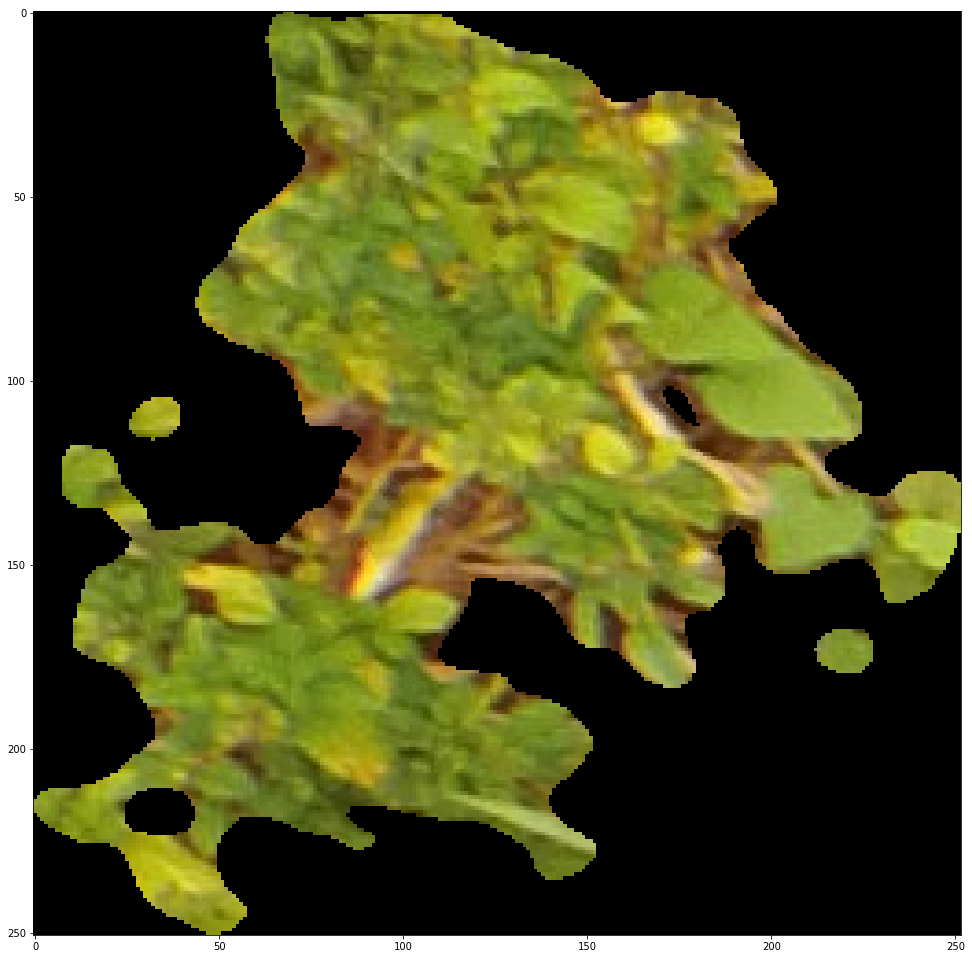

(251, 252, 3)


In [28]:
filename = os.path.join(os.path.join(directory,classes[0]),broadleaf[random.randint(0,len(broadleaf))])
show_image(filename)

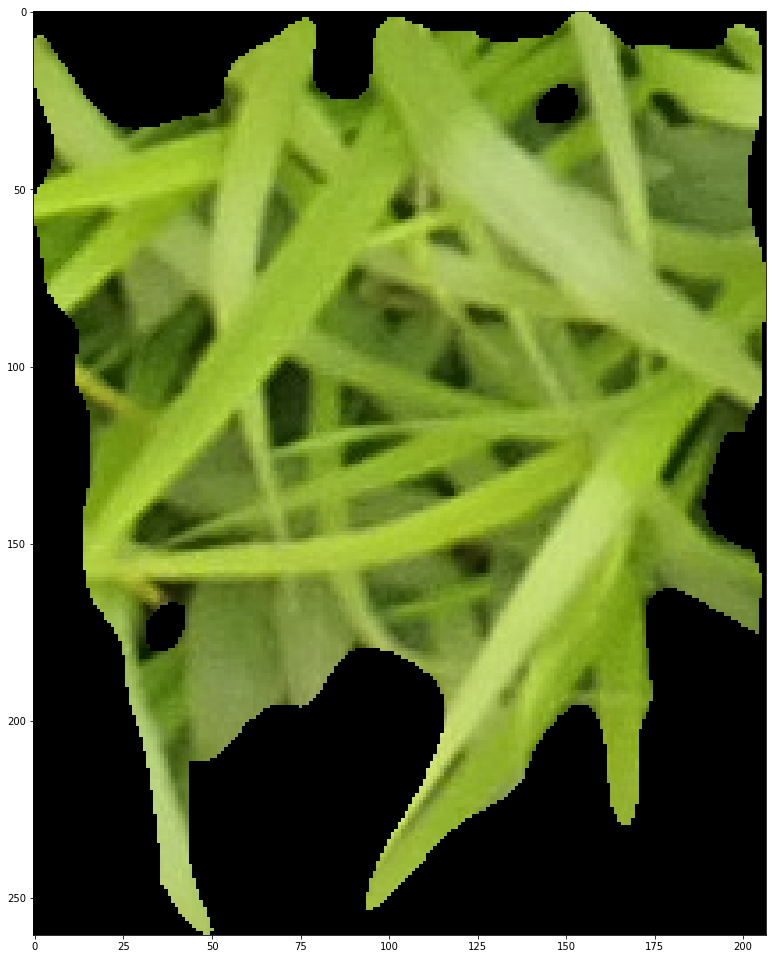

(261, 207, 3)


In [29]:
filename = os.path.join(os.path.join(directory,classes[1]),grass[random.randint(0,len(grass))])
show_image(filename)

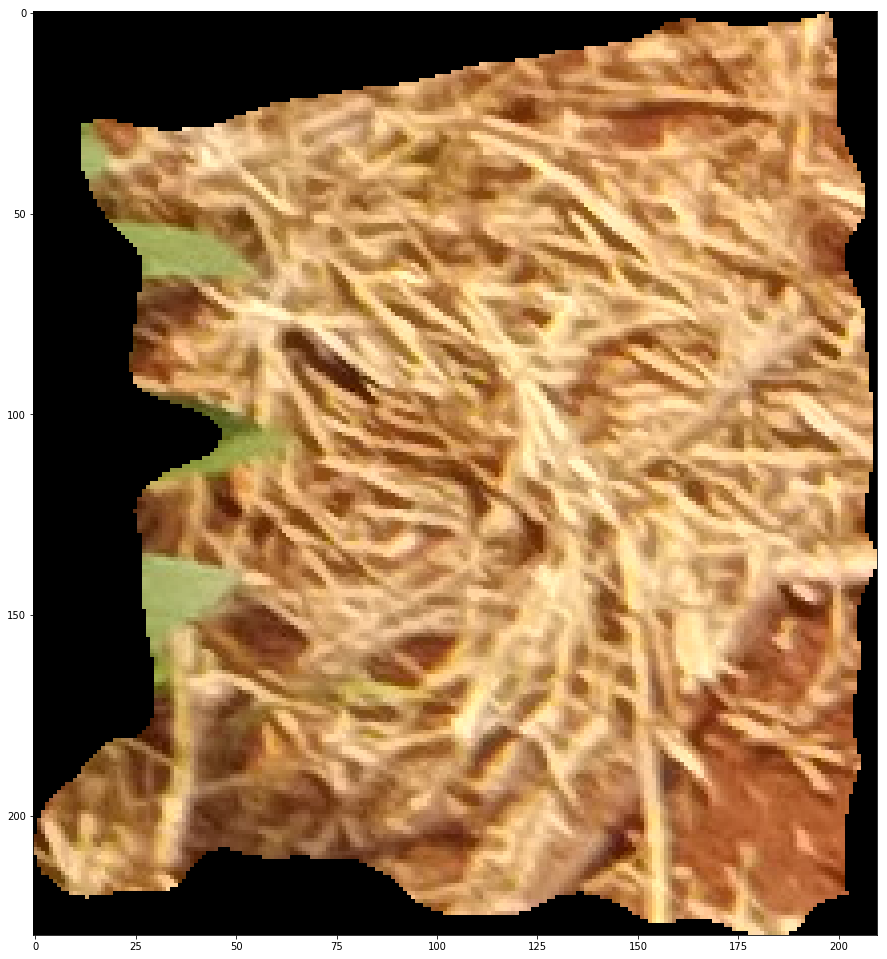

(230, 210, 3)


In [30]:
filename = os.path.join(os.path.join(directory,classes[2]),soil[random.randint(0,len(soil))])
show_image(filename)

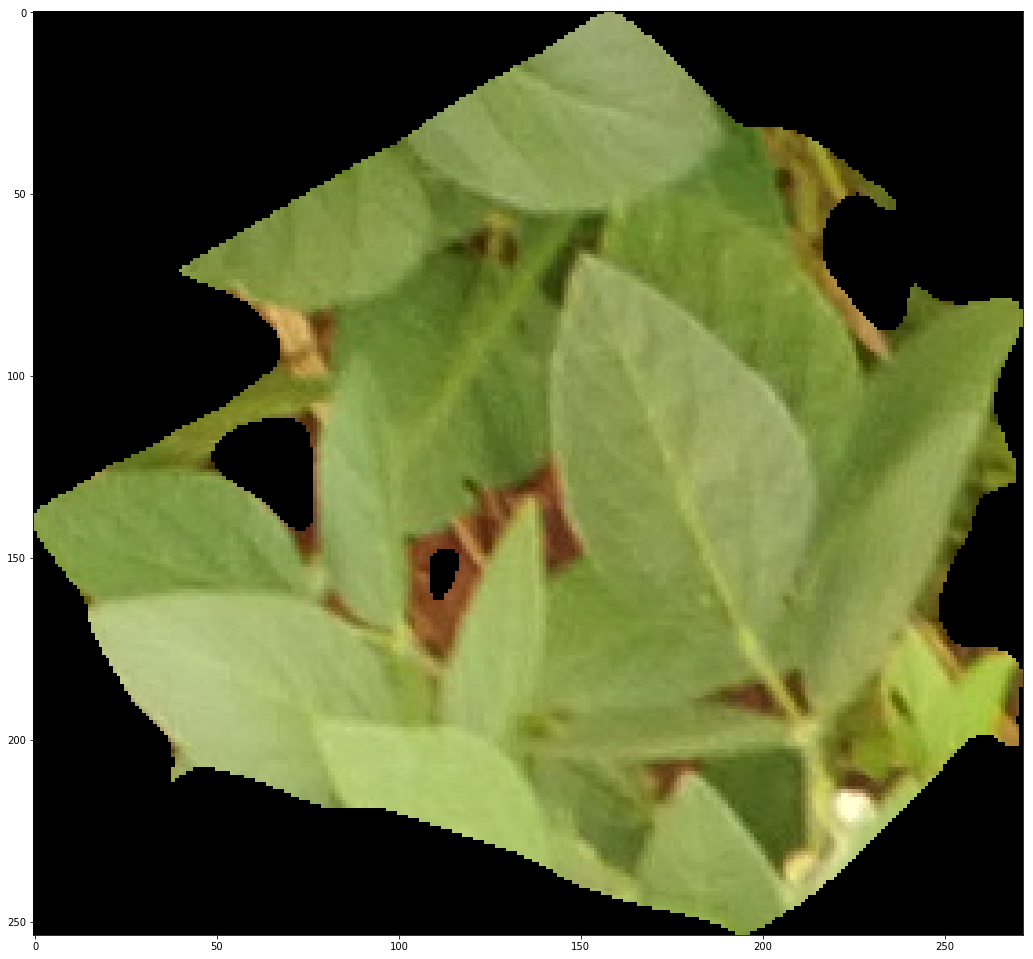

(254, 272, 3)


In [31]:
filename = os.path.join(os.path.join(directory,classes[3]),soybean[random.randint(0,len(soybean))])
show_image(filename)

In [32]:
num2class = {0: 'broadleaf', 
         1: 'grass', 
         2: 'soil', 
         3: 'soybean'}

class2num = {'broadleaf' : 0, 
         'grass' : 1, 
         'soil' : 2, 
         'soybean' : 3}

In [33]:
m = 1
num_file = 1100 * m
num_train = 1000 * m  
num_val = 50 * m
num_test = 50 * m

all_files = [] 
num_data =num_file*len(classes)
Y = np.zeros(num_data)


for i, cls in enumerate(classes):
    all_files += [f for f in glob.glob(data_dir+cls+'/*.tif')][:num_file]
    Y[i*num_file:(i+1)*num_file] = i # label all classes with int [0.. len(classes)]

In [34]:
# Image dimension
im_width = 200
im_height = 200 
im_channel = 3
dim = im_width * im_height * im_channel

X = np.ndarray(shape=(num_data, im_width, im_height, im_channel), dtype=np.float64)

for idx, file in enumerate(all_files):
    X[idx] = cv2.resize(cv2.imread(file), (im_width, im_height))

X_train = np.empty(shape=(num_train*len(classes),im_width, im_height, im_channel), dtype=np.float64)
X_val = np.empty(shape=(num_val*len(classes),im_width, im_height, im_channel), dtype=np.float64)
X_test = np.empty(shape=(num_test*len(classes),im_width, im_height, im_channel), dtype=np.float64)

y_train = np.empty(num_train*len(classes))
y_val = np.empty(num_val*len(classes))
y_test = np.empty(num_test*len(classes)) 

for i, cls in enumerate(classes): 
    X_test[num_test*i:num_test*(i+1)] = X[np.where(Y == i)[0][:num_test]]
    X_val[num_val*i:num_val*(i+1)] = X[np.where(Y == i)[0][num_test:num_test+num_val]]
    X_train[num_train*i:num_train*(i+1)] = X[np.where(Y == i)[0][num_test+num_val:]]
    
    y_test[num_test*i:num_test*(i+1)] = i
    y_val[num_val*i:num_val*(i+1)] = i
    y_train[num_train*i:num_train*(i+1)] = i

del Y 
del X

In [35]:
X_train.shape

(4000, 200, 200, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


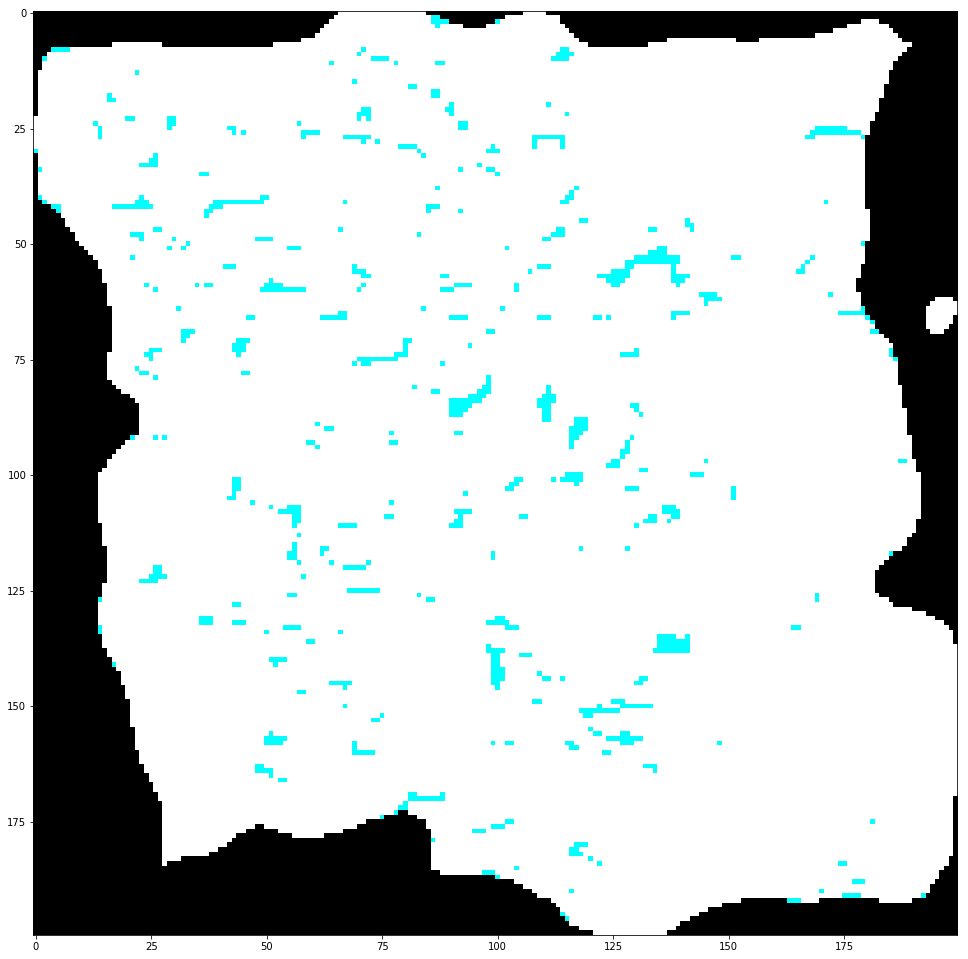

In [36]:
plt.imshow(X_train[500])

In [37]:
# Extract features 
#Shuffle training index
train_idxs = np.random.permutation(X_train.shape[0])
y_train  = y_train[train_idxs].astype(int)
X_train = X_train[train_idxs]

X_train = np.reshape(X_train, (X_train.shape[0], -1)).astype('float64')
X_test = np.reshape(X_test, (X_test.shape[0], -1)).astype('float64')
X_val = np.reshape(X_val, (X_val.shape[0], -1)).astype('float64')

X_tiny = X_train[100:110].astype('float64')
y_tiny = y_train[100:110].astype(int)
num_dev = 500

X_dev = X_train[0:num_dev].astype('float64')
y_dev = y_train[0:num_dev].astype(int)
print("X_train shape", X_train.shape, "| y_train shape:", y_train.shape)
print("X_test shape", X_test.shape, "| y_test shape:", y_test.shape)
print("X_val shape", X_val.shape, "| y_val shape:", y_val.shape)
print("X_dev shape", X_dev.shape, "| y_dev shape:", y_dev.shape)
print("X_tiny shape", X_tiny.shape, "| y_tiny shape:", y_tiny.shape)

#Subtract out the mean image 
#first: compute the mean image
mean_image = np.mean(X_train, axis=0) #axis=0. stack horizontally

#Second subtract the mean image from train and test data 
X_train -= mean_image
X_val -= mean_image 
X_test -= mean_image
X_dev -= mean_image
X_tiny -= mean_image

#Third append the bias dimension using linear algebra trick
#Not for net
# X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
# X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
# X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
# X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
# X_tiny = np.hstack([X_tiny, np.ones((X_tiny.shape[0], 1))])

print('=====STACK BIAS term=====')
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("X_val shape", X_val.shape)
print("X_dev shape", X_dev.shape)
print("X_tiny shape", X_tiny.shape)

X_train shape (4000, 120000) | y_train shape: (4000,)
X_test shape (200, 120000) | y_test shape: (200,)
X_val shape (200, 120000) | y_val shape: (200,)
X_dev shape (500, 120000) | y_dev shape: (500,)
X_tiny shape (10, 120000) | y_tiny shape: (10,)
=====STACK BIAS term=====
X_train shape (4000, 120000)
X_test shape (200, 120000)
X_val shape (200, 120000)
X_dev shape (500, 120000)
X_tiny shape (10, 120000)


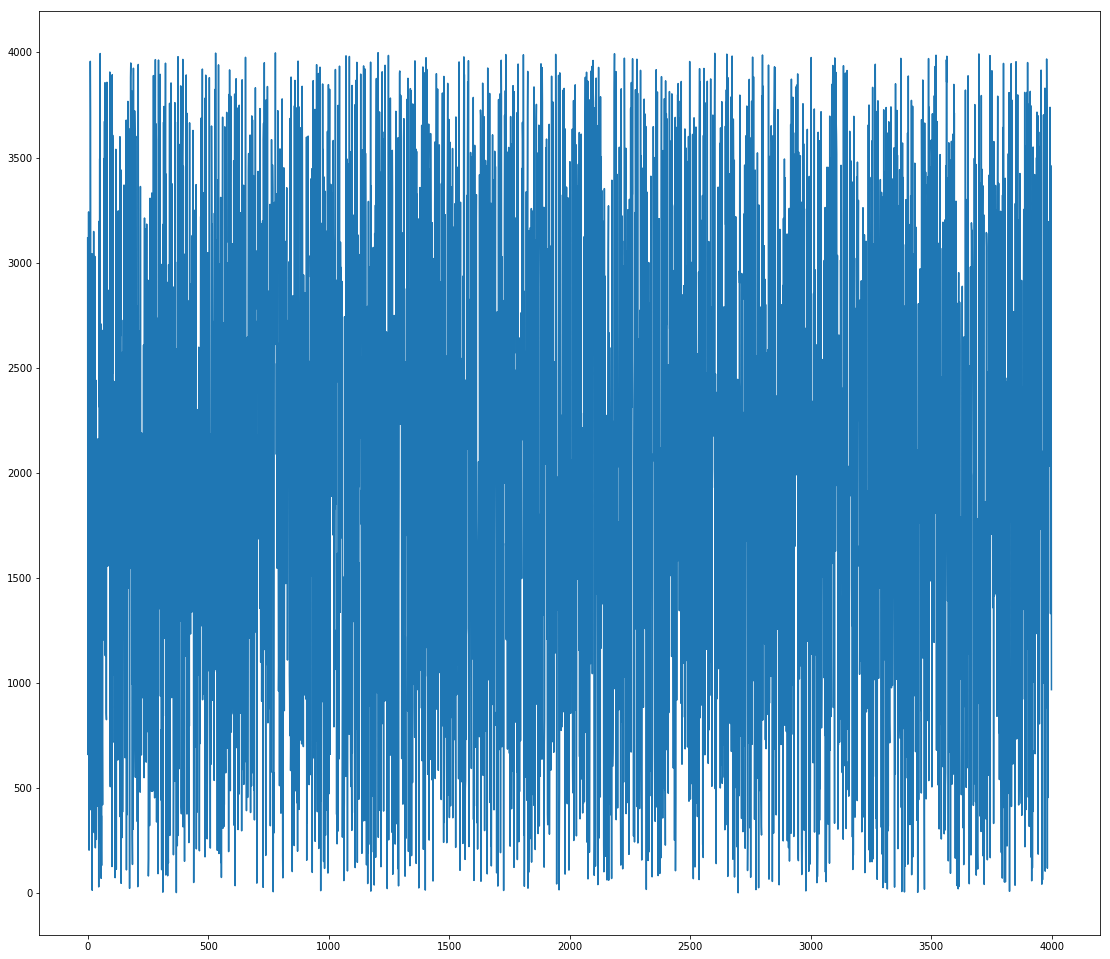

In [38]:
plt.plot(train_idxs)
plt.show()

# Visualization

In [39]:
# Visualize some images 
# Make sure that everything when OK
classes = ['broadleaf', 'grass', 'soil', 'soybean']
n_class = len(classes)
samples_per_class = 4

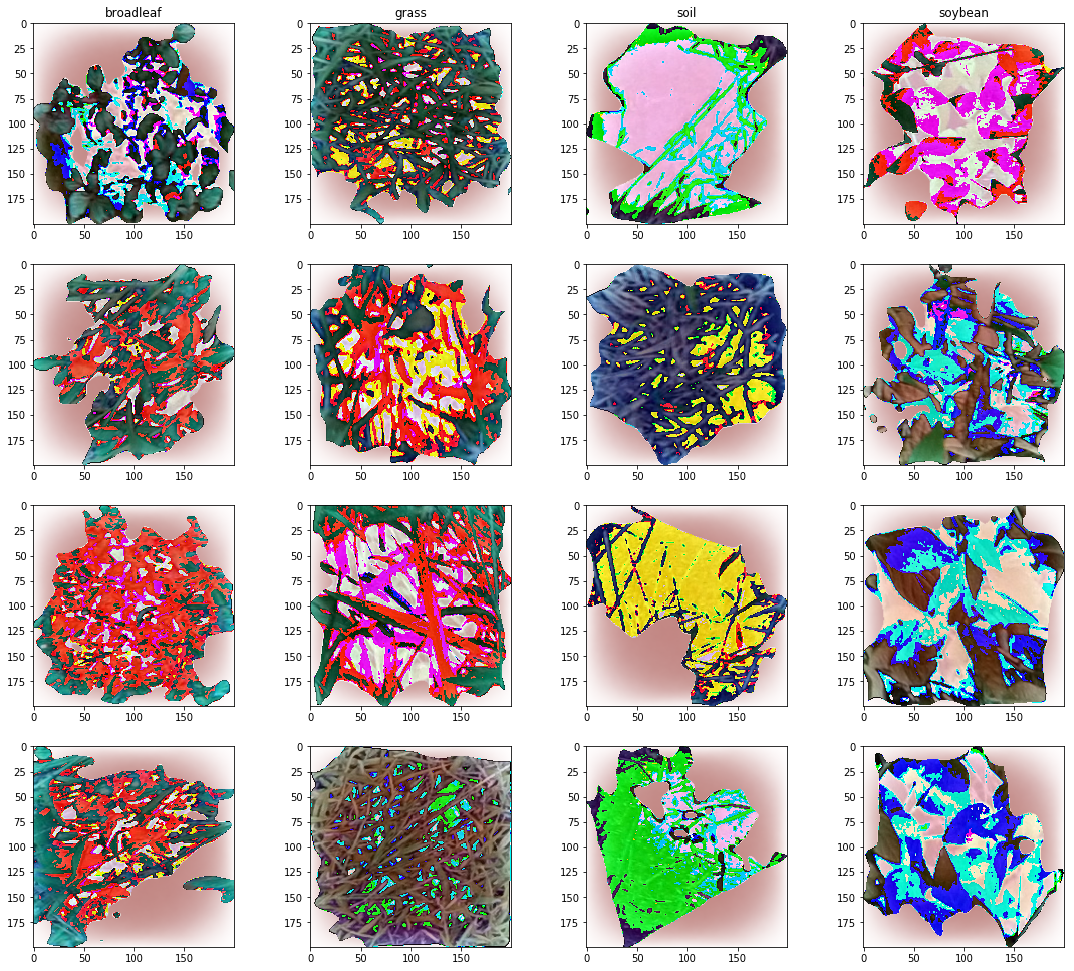

In [40]:
# show some train images
for y, cls in enumerate(classes):
    idxes = np.flatnonzero(y == y_train)
    idxes = np.random.choice(idxes, samples_per_class, replace = False)
    for i, idx in enumerate(idxes):
        plt_idx = i * n_class + y + 1
        plt.subplot(samples_per_class,n_class, plt_idx)
        plt.imshow(X_train[idx].reshape(im_width, im_height, im_channel).astype('uint8'))
        if(i==0): plt.title(cls)

plt.show()

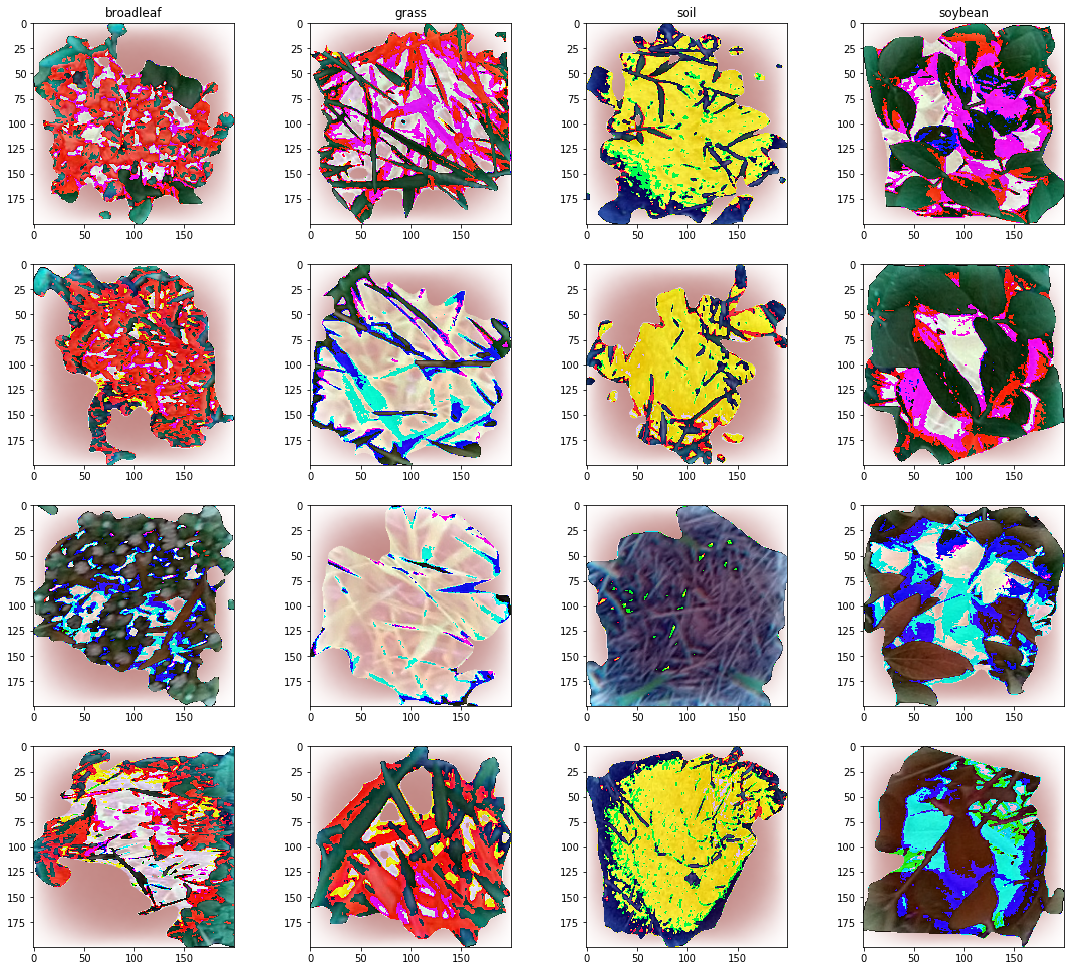

In [41]:
# show some dev images
for y, cls in enumerate(classes):
    idxes = np.flatnonzero(y == y_dev)
    idxes = np.random.choice(idxes, samples_per_class, replace = False)
    for i, idx in enumerate(idxes):
        plt_idx = i * n_class + y + 1
        plt.subplot(samples_per_class,n_class, plt_idx)
        plt.imshow(X_dev[idx].reshape(im_width, im_height, im_channel).astype('uint8'))
        if(i==0): plt.title(cls)

plt.show()

# 2-Layer Neuralnet

In [42]:
class TwoLayerNet():
    def __init__(self, input_size, hidden_size, output_size, std= 1e-4):
        '''
        std: weight initialization term
        W1: first layer weight, shape(D x H) 
        W2: second layer weight shape(H x C) 
        C: num_classes(output_size) , H: hidden_size, D: data_dim(input_size) 
        '''
        self.params = {}
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def loss(self, X, y = None, reg=0.0):
        '''
        reg: regularization strength
        X: ndarray shape(N x C). N: num of data 
        y: vector of training label
        '''
        #DEfine relu activation function 
        relu = lambda x:np.maximum(0,x)

        #unpack
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape

        #Forward prop
        layer1 = relu(X.dot(W1) + b1)  #(N,D) x (D,H) = (N,H)
        scores = layer1.dot(W2) + b2

        #if target is not given then jump out 
        if(y is None): 
            return scores

        #compute the loss 
        ##Normalization trick to prevent overflow when compute exp 
        scores -= scores.max()#stack vertically

        scores = np.exp(scores)
        scores_sumexp = np.sum(scores, axis=1)#stack vertically

        ##Nomalize all score 
        softmax = scores / scores_sumexp.reshape(N,1)  #Shape: (N, C)
        #total loss of all training. -log of all correct score
        loss =  (-1.0) * np.sum(np.log(softmax[range(N),y]))

        ##Normalize the loss and add regularization strength 
        loss /= N 
        loss += reg * np.sum(W1 * W1) 
        loss += reg * np.sum(W2 * W2) 

        #Backward pass on the net 
        grads = {}

        correct_class_scores = scores[range(N), y]
        softmax[range(N), y] = (-1.0) * (scores_sumexp - correct_class_scores)/scores_sumexp
        softmax /= N


        #Want to find dW2(dL/dW2)
        # Derivation: dL/dW2 = dL/dscore * dscore/dW2(chain rule)
        #dL/dscore = softmax since L(score) = softmax(variable)
        #dscore/dW2 = relu_(hidden layer output)
        grads['W2'] = layer1.T.dot(softmax)
        grads['b2'] = np.sum(softmax, axis=0)#stack horizontally
        grads['W2'] += reg * 2 * W2

        #dL/dW1 = dL/dscore * dscore/drelu(layler1) * drelu(layer1)/dW1 
        #dL/dW1 = dW1 = softmax * W2 * X 
        hidden = softmax.dot(W2.T)

        #derivative of a max gate
        #Intuition: in forward pass if neuron didn't fire that mean. the derivative of that neuron 
        # is 0. This might be bad since this will kill gradient. 
        hidden[layer1 == 0] = 0 

        grads['W1'] = X.T.dot(hidden) 
        grads['b1'] = np.sum(hidden, axis=0) #stack horizontally 
        grads['W1'] += reg * 2 * W1

        return loss, grads

    def train(self, X, y, X_val, y_val, 
              learning_rate =1e-3, learning_rate_decay=0.95, 
              reg=5e-6, num_iters=100, 
              batch_size=200, it_verbose = 1, verbose=False):
        '''
        Train using SGD 
        Input: 
            X: nd array shape(N x D) 
            y: vector of train label 
            X_val: nd array shape( n_VAL , D) Use as validation set after each epoch 
            y_val: vector of validation label 
        '''
        N, D = X.shape
        N_val = X_val.shape[0]
        iteration_per_epoch = max(N/batch_size, 1)
        
        loss_hist = []
        train_acc_hist = []
        val_acc_hist = []
        
        for it in range(num_iters):
            sampling = np.random.choice(np.arange(N), batch_size, replace=False) 
            X_batch = X[sampling]
            y_batch = y[sampling]
            
            #compute loss and gradients
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg)
            loss_hist.append(loss) 
            
            #Update rule 
            self.params['W1'] += (-1.0) * learning_rate * grads['W1']
            self.params['b1'] += (-1.0) * learning_rate * grads['b1']
            self.params['W2'] += (-1.0) * learning_rate * grads['W2']
            self.params['b2'] += (-1.0) * learning_rate * grads['b2']
            
            if(verbose and it%it_verbose==0):
                print('iteration: %d / %d | Loss: %f' % (it, num_iters, loss)) 
            # Every epoch, check train and val accuracy and decay learning rate.
            if (it % iteration_per_epoch == 0):
                # Check accuracy
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_hist.append(train_acc)
                val_acc_hist.append(val_acc)

                # Decay learning rate
                learning_rate *= learning_rate_decay
        return {
            'loss_hist':loss_hist,
            'train_acc_hist':train_acc_hist,
            'val_acc_hist':val_acc_hist
        }

    def predict(self, X):
        """
        Use the trained weights of this two-layer network to predict labels for
        data points. For each data point we predict scores for each of the C
        classes, and assign each data point to the class with the highest score.

        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
        classify.

        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
        the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
        to have class c, where 0 <= c < C.
        """
        y_pred = None
        relu = lambda x:np.maximum(0,x)
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']

        #Forward propagation though the network 
        layer1 = relu(X.dot(W1) + b1)
        scores = layer1.dot(W2) + b2 #shape: (N x C)
        y_pred = np.argmax(scores, axis=1)

        return y_pred

# Debug the net on dev set

In [43]:
input_size = im_width * im_height * im_channel
hidden_size = 200
output_size = n_class 
std = 1e-3 # size initialization parameter

net = TwoLayerNet(input_size, hidden_size,output_size,std )
stats = net.train(X_dev, y_dev, X_val, y_val, 
              learning_rate =1e-5, learning_rate_decay=0.95, 
              reg=0.0, num_iters=140, 
              batch_size=100, it_verbose = 10,verbose=True)

iteration: 0 / 140 | Loss: 1.422243
iteration: 10 / 140 | Loss: 1.362273
iteration: 20 / 140 | Loss: 1.302768
iteration: 30 / 140 | Loss: 1.292054
iteration: 40 / 140 | Loss: 1.259061
iteration: 50 / 140 | Loss: 1.209936
iteration: 60 / 140 | Loss: 1.197736
iteration: 70 / 140 | Loss: 1.194735
iteration: 80 / 140 | Loss: 1.155624
iteration: 90 / 140 | Loss: 1.181954
iteration: 100 / 140 | Loss: 1.156112
iteration: 110 / 140 | Loss: 1.134343
iteration: 120 / 140 | Loss: 1.115346
iteration: 130 / 140 | Loss: 1.057011


In [44]:
stats = net.train(X_train, y_train, X_val, y_val, 
              learning_rate =1e-5, learning_rate_decay=0.95, 
              reg=0.0, num_iters=300, 
              batch_size=100, it_verbose = 10,verbose=True)

iteration: 0 / 300 | Loss: 1.186209
iteration: 10 / 300 | Loss: 1.100775
iteration: 20 / 300 | Loss: 1.096701
iteration: 30 / 300 | Loss: 1.072803
iteration: 40 / 300 | Loss: 1.007505
iteration: 50 / 300 | Loss: 0.995466
iteration: 60 / 300 | Loss: 0.989432
iteration: 70 / 300 | Loss: 0.948784
iteration: 80 / 300 | Loss: 0.976910
iteration: 90 / 300 | Loss: 0.970379
iteration: 100 / 300 | Loss: 0.926181
iteration: 110 / 300 | Loss: 0.851536
iteration: 120 / 300 | Loss: 0.931709
iteration: 130 / 300 | Loss: 0.827204
iteration: 140 / 300 | Loss: 0.760497
iteration: 150 / 300 | Loss: 0.894905
iteration: 160 / 300 | Loss: 0.882540
iteration: 170 / 300 | Loss: 0.850502
iteration: 180 / 300 | Loss: 0.801503
iteration: 190 / 300 | Loss: 0.736043
iteration: 200 / 300 | Loss: 0.813885
iteration: 210 / 300 | Loss: 0.764064
iteration: 220 / 300 | Loss: 0.845998
iteration: 230 / 300 | Loss: 0.820743
iteration: 240 / 300 | Loss: 0.737180
iteration: 250 / 300 | Loss: 0.823563
iteration: 260 / 300 | 

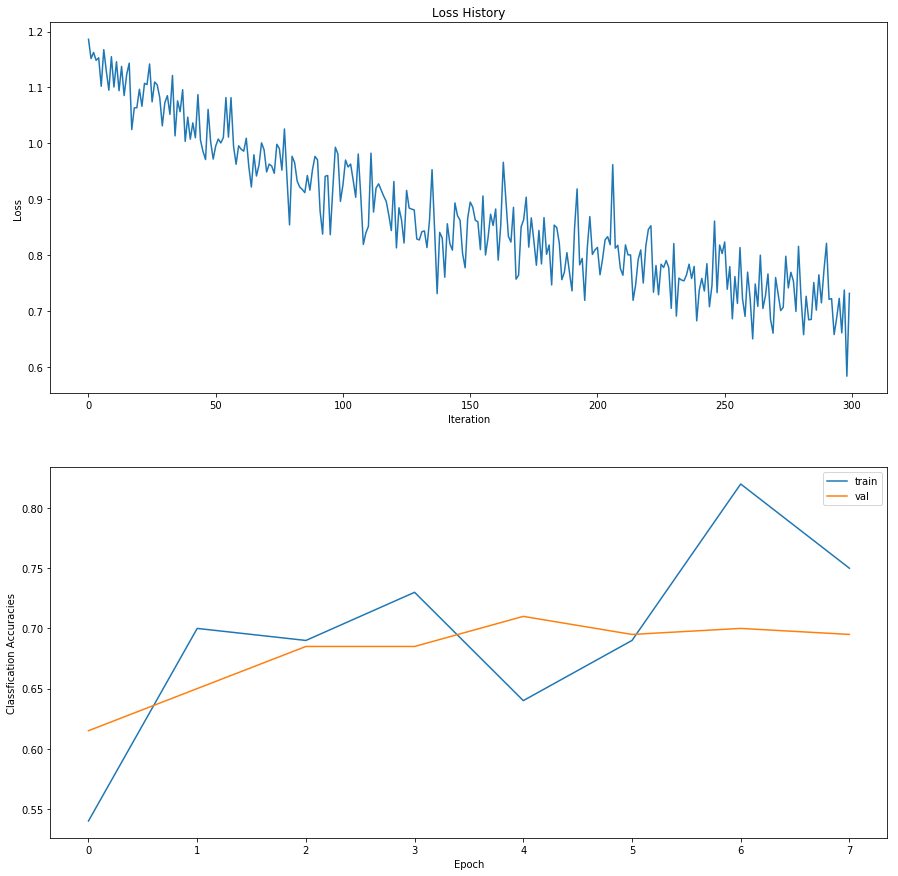

In [45]:
# plot loss history and train/ validation accuracies history
plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.subplot(2,1,1) 
plt.plot(stats['loss_hist'])
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2,1,2)
plt.plot(stats['train_acc_hist'], label='train')
plt.plot(stats['val_acc_hist'], label='val')
plt.xlabel('Epoch')
plt.ylabel('Classfication Accuracies')
plt.legend()
plt.show()

In [46]:
len(all_files)

4400

In [47]:
# Shapes X
X_train.shape, X_dev.shape, X_test.shape, X_tiny.shape

((4000, 120000), (500, 120000), (200, 120000), (10, 120000))

In [48]:
# Shapes Y
y_train.shape, y_dev.shape, y_test.shape, y_tiny.shape

((4000,), (500,), (200,), (10,))

# Make a prediction

In [49]:
def predict_random_image():
    # Choose an image
    idx = random.randint(0,len(y_dev))
    # Preprozess image
    plt.imshow((X_dev[idx]+mean_image).reshape(im_width, im_height, im_channel).astype('uint8'))
    plt.title(num2class[y_dev[idx]])
    plt.show()
    # Make the prediction
    result = net.predict(X_dev[idx].reshape(-1,X_dev[idx].shape[0]))
    print("Prediction: ", num2class[np.asscalar(result)])

In [50]:
plt.rcParams['figure.figsize'] = (11.0, 9.0) # set default size of plots

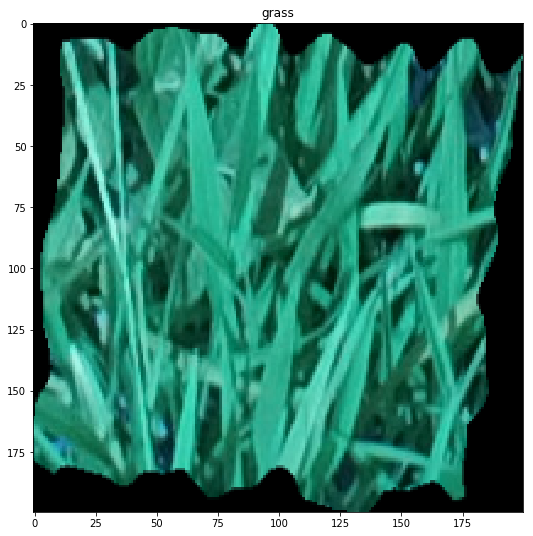

Prediction:  grass


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # Remove the CWD from sys.path while we load stuff.


In [51]:
predict_random_image()

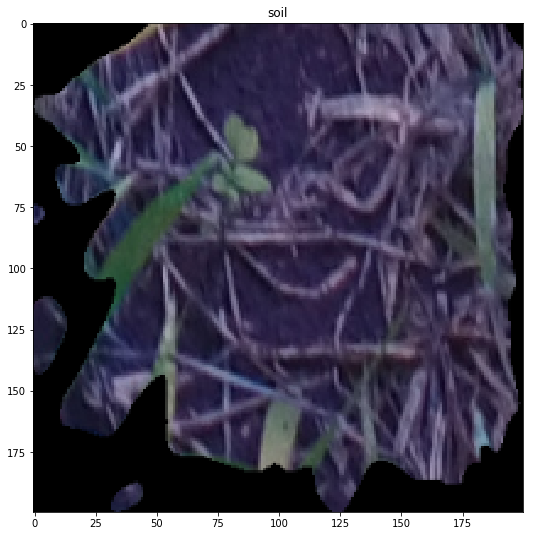

Prediction:  soil


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # Remove the CWD from sys.path while we load stuff.


In [53]:
predict_random_image()

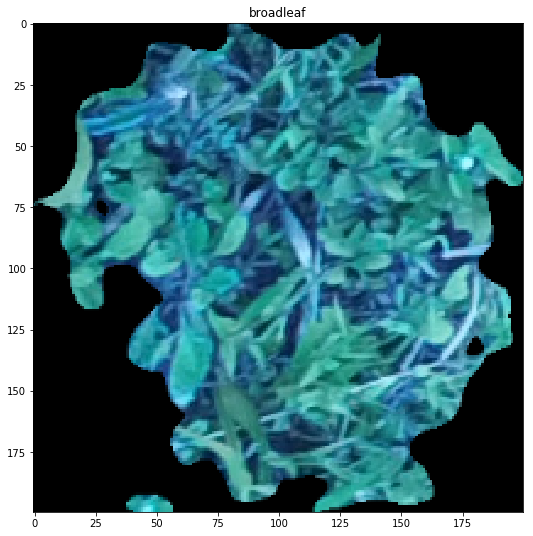

Prediction:  broadleaf


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # Remove the CWD from sys.path while we load stuff.


In [60]:
predict_random_image()

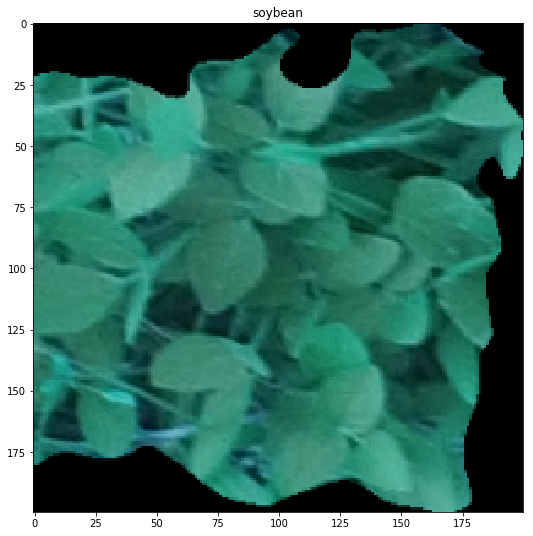

Prediction:  grass


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # Remove the CWD from sys.path while we load stuff.


In [61]:
predict_random_image()

# Check prediction statistics of the model

(array([47.,  0.,  0., 45.,  0.,  0., 54.,  0.,  0., 54.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

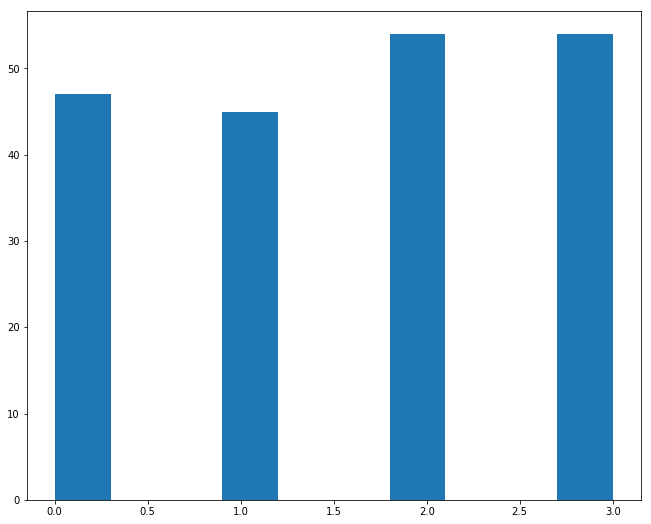

In [63]:
plt.hist(net.predict(X_test))